<a href="https://colab.research.google.com/github/manoila20/Extraction-of-Narratives-from-Online-News/blob/main/MIB2025_lab3_2manoila20.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Laborator 3: Algoritmi Genetici

## Introducere

În laboratoarele anterioare, am explorat metaheuristici bazate pe o singură soluție (traiectorie), cum ar fi Random Search, Hill Climbing, Tabu Search și Simulated Annealing. Aceste metode îmbunătățesc iterativ o soluție candidată. În acest laborator, facem un salt conceptual important: vom lucra cu **populații de soluții**.

Algoritmii Evolutivi, și în particular Algoritmii Genetici (AG), se inspiră din mecanismele evoluției naturale – selecția naturală, încrucișarea și mutația – pentru a naviga prin spații vaste de căutare și a identifica soluții (cvasi)optime pentru probleme complexe. Trecerea de la o singură soluție la o populație deschide noi orizonturi:
1.  **Explorare paralelă:** Mai multe regiuni ale spațiului soluțiilor pot fi explorate simultan, reducând riscul de a rămâne blocat în optimuri locale.
2.  **Recombinarea informației:** Prin operatori precum încrucișarea (crossover), caracteristici bune din soluții diferite pot fi combinate, potențial generând soluții superioare într-un mod în care metodele bazate pe o singură soluție nu o pot face direct.
3.  **Diversitate:** Menținerea unei populații diverse ajută la o explorare mai robustă și poate preveni convergența prematură.

În cadrul acestui laborator, ne propunem să aprofundăm conceptele discutate la curs prin analizarea și extinderea unei implementări simple a unui Algoritm Genetic. Ne concentrăm pe exemplificarea principiilor de bază și vom exersa abilitățile practice în construirea și rularea algoritmului pentru rezolvarea unor probleme de optimizare. Totodată, vom experimenta cu diverse componente ale algoritmului, observând cum influențează acestea rezultatele obținute.

În orele următoare vom explora mai în detaliu calculul evolutiv prin librării care oferă implementări avansate și facilitează utilizarea acestui domeniu.

# Concepte teoretice - recapitulare

[Calculul evolutiv](https://hmn.wiki/ro/Evolutionary_computation) este o ramură a informaticii care se inspiră din procesul de evoluție al speciilor din natură pentru a aborda și rezolva probleme complexe și dificile de optimizare. Se bazează pe ideea că populațiile evoluează prin apariția de noi caracteristici în indivizi prin încrucișare și mutații, iar cei mai bine adaptați supraviețuiesc și se reproduc. Ideea fundamentală este că o întreagă populație de soluții candidate evoluează, nu doar una singură.

Calculul evolutiv este folosit în rezolvarea problemelor care implică căutarea și optimizarea în spații largi de soluții. Aceste probleme pot fi întâlnite în diverse domenii, cum ar fi planificarea (ex: orare, rute logistice), proiectarea (ex: circuite electronice, structuri arhitecturale, design de medicamente), modelarea (ex: sisteme biologice, piețe financiare) și analiza datelor (ex: selecția de caracteristici în machine learning).

Un [algoritm genetic](https://ro.wikipedia.org/wiki/Algoritm_genetic) reprezintă o metodă specifică de calcul evolutiv. Este structurat în mai multe etape și implică utilizarea unor operatori cheie pentru a genera și îmbunătăți soluțiile în timpul procesului de evoluție.

Structura unui algoritm genetic include următoarele componente:

1.  **Reprezentarea soluțiilor (cromozomii):** Fiecare soluție potențială este codificată sub forma unui "cromozom". Această codificare poate fi binară (șiruri de 0 și 1), reală (vectori de numere reale), specifică problemei (ex: permutări pentru problema comis-voiajorului, structuri arborescente pentru programarea genetică). Alegerea reprezentării este crucială și influențează direct designul operatorilor genetici.
2.  **Inițializarea populației:** Se creează o populație inițială de `N` indivizi (cromozomi), care reprezintă soluții potențiale pentru problema dată. Această inițializare poate fi realizată aleatoriu sau utilizând cunoștințe a priori (euristici specifice problemei pentru a genera soluții inițiale de o calitate mai bună).
3.  **Funcția fitness (evaluarea populației):** Fiecare individ din populație este evaluat în funcție de cât de bine rezolvă problema. Acest lucru se realizează prin calcularea unei valori de "fitness", care măsoară calitatea soluției. Algoritmii genetici tind să maximizeze această funcție. Dacă problema este una de minimizare, funcția fitness trebuie transformată corespunzător (ex: `1/cost` sau `C_max - cost`).
4.  **Selecția părinților:** Indivizii cu un grad mai mare de adaptare (fitness mai bun) au o probabilitate mai mare de a fi selectați ca părinți pentru generația următoare. Această selecție introduce "presiunea selectivă", favorizând propagarea caracteristicilor bune. Metode comune includ selecția turnir, selecția proporțională cu fitness-ul (ruletă), selecția bazată pe rang.
5.  **Operatori genetici (recombinare și mutație):**
    *   **Încrucișare (Crossover):** Materialul genetic al părinților selectați este combinat pentru a genera unul sau mai mulți urmași (copii). Acest proces imită recombinarea genetică și este principalul mecanism de explorare care combină "blocurile constructive" (building blocks) ale soluțiilor bune. Tipurile de încrucișare depind de reprezentarea cromozomilor (ex: încrucișare cu un punct, cu două puncte, uniformă pentru reprezentări binare/numerice; PMX, OX pentru permutări).
    *   **Mutație:** După încrucișare, se aplică (de obicei cu o probabilitate mică) mutații asupra materialului genetic al urmașilor. Mutația introduce variație genetică nouă în populație și ajută la explorarea unor regiuni noi din spațiul soluțiilor, prevenind convergența prematură către optimuri locale. Tipurile de mutație sunt, de asemenea, dependente de reprezentare (ex: inversarea unui bit, schimbarea unei valori numerice, swap între două elemente dintr-o permutare).
6.  **Evaluarea urmașilor:** Urmașii generați sunt evaluați folosind funcția fitness.
7.  **Selecția supraviețuitorilor (formarea noii generații):** Din populația curentă și urmașii generați, se selectează indivizii care vor forma populația pentru generația următoare. Strategiile pot include înlocuirea totală a părinților cu copiii, elitismul (păstrarea celor mai buni `k` indivizi din generația curentă), sau diverse forme de competiție.
8.  **Condiția de oprire:** Procesul iterativ (pașii 3-7) continuă până la îndeplinirea unui criteriu de oprire: un număr maxim de generații, atingerea unui nivel de fitness satisfăcător, stagnarea îmbunătățirii soluției pentru un număr de generații, etc.

Pseudocodul metodei, preluat din [acest](https://www.researchgate.net/publication/332801363_A_GENETIC_ALGORITHM_FOR_TSP_WITH_BACKHAULS_BASED_ON_CONVENTIONAL_HEURISTICS) articol, este prezentat în Fig. 1.

![](https://www.researchgate.net/profile/Ilter-Oender/publication/332801363/figure/fig1/AS:754028925444100@1556785913783/Pseudo-code-for-a-simple-genetic-algorithm.png)

Figura 1. Schema generală a unui Algoritm Genetic.

Proiectarea unui algoritm genetic implică luarea în considerare a mai multor aspecte. Pentru alegerea operatorilor, trebuie să se țină cont de specificul problemei și de **reprezentarea soluțiilor**. **Codificarea** poate fi binară, reală sau specifică (structuri arborescente de exemplu), în funcție de natura problemei și a soluțiilor căutate.

De asemenea, **funcția fitness** trebuie definită astfel încât să măsoare gradul de adecvare a fiecărui individ față de obiectivele problemei. Aceasta poate fi o măsură a calității, o valoare numerică sau o funcție obiectiv.

În plus, este importantă selectarea adecvată a **operatorilor de selecție, încrucișare și mutație**. Acești operatori influențează explorarea și exploatarea spațiului soluțiilor. În general, selecția favorizează soluțiile mai bune, încrucișarea combină materialul genetic al părinților, iar mutația introduce variație.

Construirea unui algoritm genetic eficient implică optimizarea acestor componente și ajustarea parametrilor algoritmului, cum ar fi mărimea populației, probabilitățile de selecție, încrucișare și mutație, în funcție de natura problemei și de obiectivele dorite. Găsirea setului optim de parametri este adesea un proces empiric, de tip trial-and-error, sau poate fi abordat prin tehnici de meta-optimizare.

Prin urmare, construirea unui algoritm genetic implică atât aspecte teoretice, cum ar fi selectarea operatorilor și definirea funcției fitness, cât și aspecte practice, cum ar fi ajustarea parametrilor și evaluarea performanței algoritmului în rezolvarea problemei.

# Implementare manuală
Să construim pas cu pas o clasă Python pentru un Algoritm Genetic simplu.

In [ ]:
import random
import math
import numpy as np # Util pentru permutări și operații vectoriale

class GeneticAlgorithm:
  def __init__(self, population_size, chromosome_length, gene_lower_bound, gene_upper_bound, verbose=False, global_opt_val = math.inf, problem_type='maximization'):
    self.population_size = population_size  # Numărul de indivizi din populație
    self.chromosome_length = chromosome_length # Lungimea unui cromozom (numărul de gene)
    self.gene_lower_bound = gene_lower_bound # Valoarea minimă a unei gene (pentru reprezentări numerice/binare)
    self.gene_upper_bound = gene_upper_bound # Valoarea maximă a unei gene
    self.population = [] # Lista indivizilor din populația curentă
    self.fitness_values = [] # Lista valorilor fitness pentru indivizii din populația curentă
    self.verbose = verbose # Flag pentru afișarea mesajelor de log
    self.global_opt_val = global_opt_val # Valoarea optimă globală cunoscută (dacă există), pentru oprire timpurie
    self.problem_type = problem_type # 'maximization' sau 'minimization', important pentru evaluare și selecție
                                     # Deși AG-ul canonic maximizează fitness-ul, putem adapta pentru probleme de minimizare
                                     # la nivelul funcției fitness sau prin transformări interne.
                                     # În această implementare, vom considera că funcția fitness furnizată este deja
                                     # pregătită pentru maximizare (ex: 1/cost pentru minimizare).

  def log(self, message):
    if self.verbose:
      print(message)

  def initialize_population(self):
    """
    Inițializează populația cu indivizi generați aleatoriu.
    Pentru probleme cu reprezentare specifică (ex: permutări), această metodă ar trebui suprascrisă sau adaptată.
    """
    self.population = []
    for _ in range(self.population_size):
      # Generează un cromozom ca listă de gene aleatorii
      chromosome = [ random.randint(self.gene_lower_bound, self.gene_upper_bound) for _ in range(self.chromosome_length)]
      self.population.append(chromosome)
    self.log(f"Populație inițializată cu {self.population_size} indivizi.")

  def evaluate_fitness(self, fitness_func):
    """
    Calculează și stochează valorile fitness pentru fiecare individ din populația curentă.
    fitness_func: o funcție care primește un cromozom și returnează valoarea sa de fitness.
                  Se așteaptă ca un fitness mai mare să fie mai bun.
    """
    self.fitness_values = []
    for chromosome in self.population:
      fitness = fitness_func(chromosome)
      self.fitness_values.append(fitness)
    # self.log(f"Fitness-ul populației a fost evaluat.")

  def select_parent(self, selection_type='tournament', tournament_size=2):
    """
    Selectează un părinte din populația curentă folosind metoda specificată.
    """
    if selection_type == 'tournament':
      # Selectează aleatoriu `tournament_size` indivizi din populație
      participants_indices = random.sample(range(self.population_size), tournament_size)
      # Câștigătorul turneului este individul cu cel mai bun fitness dintre participanți
      # `max` este folosit presupunând că un fitness mai mare este mai bun
      winner_index = max(participants_indices, key=lambda i: self.fitness_values[i])
      # self.log(f'Turneu: participanți {participants_indices}, câștigător {winner_index} (fitness: {self.fitness_values[winner_index]})')
      selected_parent = self.population[winner_index]
    elif selection_type == 'roulette':
      # TO DO - Implementați selecția ruletă (proporțională cu fitness-ul)
      # Asigurați-vă că gestionați fitness-urile negative sau zero dacă este cazul,
      # de obicei prin scalare sau translatare.
      # Probabilitățile de selecție se pot recalcula de fiecare dată (ineficient)
      # sau doar o dată per generație.
      pass # Placeholder
      raise NotImplementedError("Selecția Ruletă nu este încă implementată.")
    elif selection_type == 'rank':
      # TO DO - Implementați selecția bazată pe rang
      # Indivizii sunt ordonați după fitness, iar probabilitatea de selecție depinde de rang, nu de valoarea absolută a fitness-ului.
      # Acest lucru poate preveni dominarea prematură de către indivizi "super-fit".
      pass # Placeholder
      raise NotImplementedError("Selecția bazată pe Rang nu este încă implementată.")
    else:
      raise ValueError(f'Tip de selecție necunoscut: {selection_type}')

    return selected_parent

  def crossover(self, parent1, parent2, crossover_type='one-point'):
    """
    Realizează încrucișarea între doi părinți pentru a genera doi copii.
    """
    if self.chromosome_length < 2 and crossover_type in ['one-point', 'two-point']: # Nu se poate face crossover cu punct de tăiere pe cromozomi de lungime 1
        return list(parent1), list(parent2) # Returnează copii identici cu părinții

    child1, child2 = list(parent1), list(parent2) # Copiem părinții pentru a nu-i modifica direct

    if crossover_type == 'one-point':
      if self.chromosome_length <= 1: # Caz special: cromozom prea scurt pentru one-point
          return child1, child2
      # Alege un punct de tăiere aleatoriu, evitând capetele (0 și lungimea cromozomului)
      # pentru a asigura un schimb efectiv de material genetic.
      crossover_point = random.randint(1, self.chromosome_length - 1)
      # Copilul 1: prima parte de la părintele 1, a doua parte de la părintele 2
      child1 = parent1[:crossover_point] + parent2[crossover_point:]
      # Copilul 2: prima parte de la părintele 2, a doua parte de la părintele 1
      child2 = parent2[:crossover_point] + parent1[crossover_point:]
    elif crossover_type == 'two-point':
      # TO DO - Implementați încrucișarea cu două puncte de tăiere
      # Se aleg două puncte de tăiere, iar materialul genetic dintre ele este schimbat între părinți.
      # Asigurați-vă că al doilea punct este după primul.
      if self.chromosome_length < 3: # Necesită cel puțin 3 gene pentru a avea sens
          return child1, child2

      pass # Placeholder
      raise NotImplementedError("Încrucișarea cu Două Puncte nu este încă implementată.")
    elif crossover_type == 'uniform':
      # TO DO - Implementați încrucișarea uniformă
      # Pentru fiecare genă, se decide aleatoriu (de obicei cu probabilitate 0.5)
      # de la care părinte va moșteni gena fiecare copil.

      pass # Placeholder
      raise NotImplementedError("Încrucișarea Uniformă nu este încă implementată.")
    # Pentru operatori specifici precum PMX, aceștia ar trebui implementați separat
    # și chemați condiționat, posibil printr-un parametru `representation_type`.
    else:
      raise ValueError(f'Tip de încrucișare necunoscut: {crossover_type}')

    return child1, child2

  def mutate(self, chromosome, mutation_probability, mutation_type='random_reset'):
    """
    Aplică mutația unui cromozom.
    mutation_probability: probabilitatea ca fiecare genă să sufere o mutație.
    """
    mutated_chromosome = list(chromosome) # Creăm o copie pentru a nu modifica originalul

    if mutation_type == 'random_reset':
        for i in range(len(mutated_chromosome)):
            if random.random() < mutation_probability:
                # Gena este resetată la o valoare aleatorie în intervalul specificat
                mutated_chromosome[i] = random.randint(self.gene_lower_bound, self.gene_upper_bound)
    elif mutation_type == 'single_gene_random_change':
        # TO DO - Implementați mutația ce schimbă aleator doar o singură genă din cromozom
        # (dacă o mutație are loc, conform unei probabilități globale de mutație pentru întreg cromozomul,
        # sau se alege o genă și se mută necondiționat?)
        # Varianta 1: O singură genă este aleasă și modificată, dacă random.random() < mutation_probability_per_chromosome
        # Varianta 2: O singură genă este aleasă aleatoriu și modificată necondiționat (sau cu o probabilitate foarte mare).
        # Aici implementăm: dacă are loc mutația (global), o singură genă este aleasă și modificată.

        pass # Placeholder
        raise NotImplementedError("Mutația 'single_gene_random_change' nu este încă implementată.")
    # Pentru operatori specifici precum 2-opt swap, aceștia ar trebui implementați separat.
    else:
        raise ValueError(f"Tip de mutație necunoscut: {mutation_type}")

    return mutated_chromosome

  def create_offsprings(self, num_offsprings, selection_type, tournament_size, crossover_type, mutation_probability, mutation_type):
    """
    Creează o populație de urmași.
    """
    offspring_population = []
    # Vom genera perechi de copii până umplem populația de urmași
    # (sau până la num_offsprings, dacă e diferit de population_size)
    while len(offspring_population) < num_offsprings:
      parent1 = self.select_parent(selection_type, tournament_size)
      parent2 = self.select_parent(selection_type, tournament_size)
      # Este o practică bună să ne asigurăm că părinții sunt diferiți,
      # deși selecția turnir reduce probabilitatea de a selecta același părinte de două ori.

      # Aplicăm încrucișarea pentru a genera doi copii
      # Dacă nu are loc crossover-ul, copiii sunt clone ale părinților.
      # Pentru simplitate aici, crossover-ul se aplică mereu.
      child1, child2 = self.crossover(parent1, parent2, crossover_type)

      # Aplicăm mutația fiecărui copil
      child1 = self.mutate(child1, mutation_probability, mutation_type)
      child2 = self.mutate(child2, mutation_probability, mutation_type)

      offspring_population.append(child1)
      # Adăugăm al doilea copil doar dacă mai este loc
      if len(offspring_population) < num_offsprings:
        offspring_population.append(child2)

    return offspring_population

  def elitism(self, num_elites):
    """
    Selectează cei mai buni `num_elites` indivizi din populația curentă.
    Returnează elitele, fitness-ul lor și indicii sortați ai întregii populații.
    """
    # Sortează indicii indivizilor în funcție de fitness-ul lor, descrescător
    # Presupunem că un fitness mai mare este mai bun.
    sorted_indices = sorted(range(self.population_size), key=lambda i: self.fitness_values[i], reverse=True)

    elites = [self.population[i] for i in sorted_indices[:num_elites]]
    elites_fitness = [self.fitness_values[i] for i in sorted_indices[:num_elites]]

    return elites, elites_fitness, sorted_indices

  def select_new_population(self, offspring_population, num_elites=0, replacement_strategy='generational'):
    """
    Formează noua generație de indivizi.
    replacement_strategy: 'generational' (copiii înlocuiesc părinții, posibil cu elitism)
                          'steady-state' (o parte din populație este înlocuită - necesită altă logică)
                          'competitive' (copiii concurează cu părinții)
    """
    new_population = []

    if replacement_strategy == 'generational':
        # Elitism: cei mai buni `num_elites` indivizi din generația curentă sunt transferați direct
        if num_elites > 0:
            elites, elites_fitness, _ = self.elitism(num_elites)
            self.log(f"Elite selectate ({num_elites}): fitness-uri {elites_fitness}")
            new_population.extend(elites)

        # Restul populației este format din urmași
        # Ne asigurăm că nu depășim `population_size`
        remaining_slots = self.population_size - len(new_population)
        new_population.extend(offspring_population[:remaining_slots])

    elif replacement_strategy == 'competitive':
        # TO DO - Implementați o formă de competiție (ex: (μ+λ) sau (μ,λ) selection)
        # Combinați populația curentă și urmașii, apoi selectați cei mai buni `population_size` indivizi.

        # Apoi sortare și selecție.
        pass # Placeholder
        raise NotImplementedError("Strategia de înlocuire 'competitive' nu este încă implementată.")
    else:
        raise ValueError(f"Strategie de înlocuire necunoscută: {replacement_strategy}")

    # Asigură că noua populație are dimensiunea corectă (în caz de erori de calcul al sloturilor)
    # Aceasta este o măsură de siguranță; ideal, logica de mai sus ar trebui să fie corectă.
    if len(new_population) > self.population_size:
        new_population = new_population[:self.population_size]
    elif len(new_population) < self.population_size:
        # Ar putea fi necesar să umplem cu indivizi aleatori sau copii suplimentari,
        # dar în mod normal, num_offsprings ar trebui să fie cel puțin population_size - num_elites
        self.log(f"Atenție: Noua populație are {len(new_population)} indivizi, mai puțin decât {self.population_size}.")


    return new_population

  def evolve(self, fitness_func, num_generations=100,
             selection_type='tournament', tournament_size=2,
             crossover_type='one-point', mutation_probability=0.05, mutation_type='random_reset',
             num_elites=1, replacement_strategy='generational'):
    """
    Rulează procesul evolutiv pentru un număr dat de generații.
    """
    self.initialize_population()
    self.evaluate_fitness(fitness_func) # Evaluează populația inițială

    best_overall_solution = None
    best_overall_fitness = -math.inf # Presupunând maximizare

    for gen in range(num_generations):
      self.log(f"\n--- Generația {gen + 1}/{num_generations} ---")

      # Reproducere - creează o populație de urmași
      # Pentru strategia 'generational', numărul de urmași este de obicei `population_size - num_elites`
      # sau `population_size` dacă nu folosim elitism sau dacă elitele sunt alese din urmași + părinți.
      # Aici, `create_offsprings` va genera `population_size` urmași, iar `select_new_population` va gestiona elitele.
      num_offsprings_to_create = self.population_size
      if replacement_strategy == 'generational' and num_elites > 0:
          num_offsprings_to_create = self.population_size - num_elites


      offspring_population = self.create_offsprings(
          num_offsprings=num_offsprings_to_create,
          selection_type=selection_type, tournament_size=tournament_size,
          crossover_type=crossover_type,
          mutation_probability=mutation_probability, mutation_type=mutation_type
      )

      # Formarea noii populații
      # Urmașii trebuie evaluați înainte de a forma noua populație, dacă strategia de selecție a supraviețuitorilor
      # se bazează pe fitness-ul lor (ex: dacă ar concura cu părinții sau dacă elitele ar fi alese dintre ei).
      # În implementarea noastră actuală, `select_new_population` cu `generational`
      # pur și simplu ia elitele din vechea populație și completează cu urmași.
      # Deci, evaluarea completă a fitness-ului se face după ce noua populație este formată.

      # Dacă am avea o strategie competitivă, am evalua urmașii aici:
      # offspring_fitness_values = [fitness_func(offspring) for offspring in offspring_population]

      self.population = self.select_new_population(offspring_population, num_elites, replacement_strategy)
      self.evaluate_fitness(fitness_func) # Evaluează noua populație

      # Găsește și afișează cea mai bună soluție din generația curentă
      current_best_idx = max(range(self.population_size), key=lambda i: self.fitness_values[i])
      current_best_fitness = self.fitness_values[current_best_idx]
      current_best_solution = self.population[current_best_idx]

      self.log(f"Cea mai bună soluție în generația {gen + 1}: fitness = {current_best_fitness}")
      # self.log(f"Soluția: {current_best_solution}") # Poate fi prea verbos pentru cromozomi lungi

      # Actualizează cea mai bună soluție globală găsită
      if current_best_fitness > best_overall_fitness:
          best_overall_fitness = current_best_fitness
          best_overall_solution = list(current_best_solution) # Copie
          self.log(f"Nouă cea mai bună soluție globală găsită!")

      # Condiție de oprire dacă s-a atins optimul global cunoscut
      # (presupunând că `global_opt_val` este definit și este pentru maximizare)
      if best_overall_fitness >= self.global_opt_val:
        self.log(f"Optimul global ({self.global_opt_val}) atins în generația {gen + 1}. Oprire.")
        break

      # Resetare probabilități pentru selecția ruletă, dacă este folosită și implementată astfel
      # if selection_type == 'roulette' and hasattr(self, 'chromosome_probabilities'):
      #    self.chromosome_probabilities = []


    self.log("\nEvoluția finalizată.")
    self.log(f"Cea mai bună soluție găsită: {best_overall_solution}")
    self.log(f"Fitness-ul acesteia: {best_overall_fitness}")
    return best_overall_solution, best_overall_fitness


Algoritmul genetic implementat este unul de bază, realizat cu scop didactic. Există numeroase variante și tehnici avansate în domeniul Calculului Evolutiv, cum ar fi:
*   Diferite scheme de selecție, încrucișare și mutație.
*   Algoritmi genetici pentru optimizare multi-obiectiv (MOGA).
*   Strategii evolutive (ES), Programare genetică (GP), Algoritmi cu Estimarea Distribuției (EDA).
*   Tehnici hibride care combină AG cu alte metode de optimizare (ex: căutare locală).
*   Adaptarea automată a parametrilor în timpul rulării.

Pentru probleme reale și complexe, de obicei se folosesc biblioteci specializate (ex: DEAP, PyGAD în Python, și altele în diverse limbaje), care oferă implementări robuste și eficiente ale multor dintre aceste tehnici avansate.


## Problema One-Max

[Problema One-Max](https://medium.com/pragmatic-programmers/introducing-the-one-max-problem-c128ebd6b3ee) este un exemplu clasic în domeniul algoritmilor genetici și reprezintă o problemă simplă de optimizare. Scopul acestei probleme este de a găsi o soluție care maximizează suma valorilor unui șir de biți (reprezentat ca un cromozom). Formal, avem un șir binar de lungime fixă `L` și dorim să găsim un individ (cromozom) care are toți biții setați la valoarea 1. De exemplu, pentru un șir de lungime 10, soluția optimă ar fi `1111111111`, iar fitness-ul său ar fi 10.

Această problemă simplă este folosită adesea pentru a ilustra conceptele de bază ale algoritmilor genetici și pentru a testa și calibra implementările acestora. De asemenea, este o problemă utilă pentru a evalua performanța și eficiența diferitelor strategii de selecție și operatori genetici.

Problema One-Max poate fi reprezentată sub forma unui vector de biți, unde fiecare genă reprezintă un bit (0 sau 1), iar fitness-ul unui individ este pur și simplu suma biților săi.

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')


Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [9, 8]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [9, 9]
Cea mai bună soluție în generația 2: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 2. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


## Problema partiției (Partition Problem) revizitată

Cum aam văzut și în laboratorul 2, problema partiției ([Partition problem](https://en.wikipedia.org/wiki/Partition_problem)) este o problemă clasică de optimizare combinatorială, NP-dificilă. Dată o mulțime (sau multiset) `S` de numere întregi, scopul este de a împărți `S` în două submulțimi, `S1` și `S2`, astfel încât diferența absolută dintre suma elementelor din `S1` și suma elementelor din `S2` să fie minimă. Ideal, dacă o partiție perfectă există, această diferență este 0.

**Reprezentarea soluției:** Pentru a aborda problema partiției folosind un algoritm genetic, putem reprezenta o soluție ca un vector binar (cromozom) de aceeași lungime ca și mulțimea de numere `S`. Fiecare genă `g_i` din cromozom corespunde numărului `s_i` din `S`. Dacă `g_i = 0`, atunci `s_i` aparține submulțimii `S1`. Dacă `g_i = 1`, atunci `s_i` aparține submulțimii `S2`.

**Funcția Fitness:** Algoritmul nostru genetic este proiectat să maximizeze fitness-ul. Problema partiției este una de minimizare (vrem să minimizăm `abs(sum(S1) - sum(S2))`). Trebuie să transformăm acest obiectiv de minimizare într-o funcție de maximizare.
Fie `diff = abs(sum(S1) - sum(S2))`.
O metodă comună este:
1.  `fitness = 1 / (1 + diff)`: Această funcție este maximă (1) când `diff = 0` și scade pe măsură ce `diff` crește. Adăugarea lui 1 la numitor previne împărțirea la zero (technică numită [Laplace smoothing](https://en.wikipedia.org/wiki/Additive_smoothing)).
2.  `fitness = C_max - diff`: Unde `C_max` este o constantă suficient de mare (de exemplu, suma totală a tuturor numerelor, `sum(S)`). Astfel, când `diff = 0`, fitness-ul este `C_max`.

Vom folosi prima variantă. Valoarea optimă globală pentru `fitness_func` va fi 1 (când `diff = 0`).

In [ ]:
# Setul de numere pentru problema partiției
numbers_partition = [25,7,13,31,42,17,21,10,32,30,2,101,200,99,500,420,80,45,39,1,5,333,111,180,42]
# numbers_partition = [10, 20, 30, 40, 100] # Suma totala = 200. Partitie perfecta: {10,20,30,40} (100) si {100} (100). Diff = 0
# numbers_partition = [3, 1, 1, 2, 2, 1] # Suma totala = 10. Partitie perfecta: {3,1,1} (5) si {2,2,1} (5). Diff = 0

# Funcția care calculează diferența pentru problema partiției
def calculate_partition_difference(chromosome, numbers):
  sum1 = 0
  sum2 = 0
  for i in range(len(chromosome)):
    if chromosome[i] == 0: # Genă 0 -> numărul merge în prima submulțime
      sum1 += numbers[i]
    else: # Genă 1 -> numărul merge în a doua submulțime
      sum2 += numbers[i]
  return abs(sum1 - sum2)

# Funcția fitness pentru problema partiției (transformare pentru maximizare)
# Un wrapper lambda este elegant aici pentru a pasa `numbers` către funcția de calcul.
# fitness_func_partition = lambda chromo: 1.0 / (1.0 + calculate_partition_difference(chromo, numbers_partition))
# Sau, pentru a evita funcții lambda direct în apelul `evolve` dacă devine complex:
def partition_fitness_maximization(chromosome, numbers_list):
    difference = calculate_partition_difference(chromosome, numbers_list)
    # Pentru a evita împărțirea la zero dacă `calculate_partition_difference` ar putea fi negativ (nu e cazul aici)
    # și pentru a gestiona mai bine scala, putem folosi o constantă mare.
    # Total sum of all numbers could be an upper bound for the difference.
    # max_possible_difference = sum(numbers_list)
    # return max_possible_difference - difference # Asta ar face optimul global sa fie sum(numbers_list)
    return 1.0 / (1.0 + difference) # Optimul global este 1.0



In [ ]:
# Setăm parametrii pentru AG
population_sz_partition = 100
num_gens_partition = 200
mutation_prob_partition = 1.0 / len(numbers_partition) # O heuristică des întâlnită: 1/L
elites_count_partition = 5

ga_partition = GeneticAlgorithm(
    population_size=population_sz_partition,
    chromosome_length=len(numbers_partition), # Lungimea cromozomului = numărul de elemente de partiționat
    gene_lower_bound=0, # Reprezentare binară (0 sau 1)
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=1.0 # Valoarea fitness țintă (pentru partiție perfectă, diff=0, fitness=1)
)

In [ ]:
print(f"\nRezolvăm Problema Partiției pentru {len(numbers_partition)} numere...")
# Folosim o funcție lambda pentru a pasa lista `numbers_partition` către funcția fitness
best_solution_partition, best_fitness_partition = ga_partition.evolve(
    fitness_func=lambda chromo: partition_fitness_maximization(chromo, numbers_partition),
    num_generations=num_gens_partition,
    selection_type='tournament',
    tournament_size=3,
    crossover_type='one-point', # 'uniform' ar putea fi interesant de testat
    mutation_probability=mutation_prob_partition,
    mutation_type='random_reset',
    num_elites=elites_count_partition
)

print(f'\n--- Rezultat Problema Partiției ---')
print(f'Cea mai bună soluție (reprezentare binară): {best_solution_partition}')
print(f'Cel mai bun fitness (1 / (1 + diff)): {best_fitness_partition}')

# Afișăm și partiția efectivă și diferența
if best_solution_partition:
    diff = calculate_partition_difference(best_solution_partition, numbers_partition)
    print(f'Diferența absolută a sumelor submulțimilor: {diff}')
    s1 = [numbers_partition[i] for i, bit in enumerate(best_solution_partition) if bit == 0]
    s2 = [numbers_partition[i] for i, bit in enumerate(best_solution_partition) if bit == 1]
    print(f'Submulțimea 1 (suma {sum(s1)}): {s1}')
    print(f'Submulțimea 2 (suma {sum(s2)}): {s2}')
else:
    print("Nu s-a găsit nicio soluție.")


Rezolvăm Problema Partiției pentru 25 numere...
Populație inițializată cu 100 indivizi.

--- Generația 1/200 ---
Elite selectate (5): fitness-uri [0.07692307692307693, 0.034482758620689655, 0.02857142857142857, 0.02857142857142857, 0.02702702702702703]
Cea mai bună soluție în generația 1: fitness = 0.14285714285714285
Nouă cea mai bună soluție globală găsită!

--- Generația 2/200 ---
Elite selectate (5): fitness-uri [0.14285714285714285, 0.07692307692307693, 0.06666666666666667, 0.06666666666666667, 0.058823529411764705]
Cea mai bună soluție în generația 2: fitness = 0.14285714285714285

--- Generația 3/200 ---
Elite selectate (5): fitness-uri [0.14285714285714285, 0.09090909090909091, 0.07692307692307693, 0.07692307692307693, 0.06666666666666667]
Cea mai bună soluție în generația 3: fitness = 1.0
Nouă cea mai bună soluție globală găsită!
Optimul global (1.0) atins în generația 3. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 

## Optimizare vs. satisfacerea constrângerilor

Înainte de a explora o altă problemă interesantă, problema rucsacului, este util să recapitulăm distingerea între două tipuri principale de probleme pe care le putem aborda cu tehnici precum algoritmii genetici: problemele de **optimizare** și problemele de **satisfacere a constrângerilor (CSP - [Constraint Satisfaction Problems](https://en.wikipedia.org/wiki/Constraint_satisfaction_problem))**.

**Problemele de optimizare fără constrângeri (sau cu constrângeri "moi", gestionate implicit)** caută cea mai bună soluție dintr-un set de soluții posibile, conform unui anumit criteriu (funcție obiectiv). Nu există restricții "dure" care trebuie neapărat îndeplinite pentru ca o soluție să fie considerată validă, ci doar un scop de a maximiza sau minimiza o valoare. Un exemplu clasic este problema One-Max, unde dorim să maximizăm numărul de biți setați la 1, fără alte condiții. Alt exemplu ar fi găsirea parametrilor unei rețele neuronale care minimizează eroarea pe un set de date de antrenament, unde limitele parametrilor (dacă există) sunt adesea foarte largi sau gestionate prin tehnici de regularizare.

Pe de altă parte, **problemele de satisfacere a constrângerilor (CSP)** se concentrează pe găsirea *oricărei* soluții care îndeplinește un set specific de condiții sau restricții. Calitatea soluției (în sensul unui optim distinct de validitate) nu este principalul obiectiv, ci doar conformitatea cu toate constrângerile. Un exemplu este colorarea unei hărți astfel încât țările adiacente să aibă culori diferite, folosind un set dat de culori. Sudoku este un alt exemplu popular. Problema celor N Regine, în forma sa pură de CSP, cere plasarea a N regine pe o tablă de șah astfel încât niciuna să nu atace pe alta; o configurație este fie validă (satisface toate constrângerile), fie invalidă.

Interesant este că multe probleme CSP pot fi **reformulate ca probleme de optimizare** pentru a facilita rezolvarea lor prin algoritmi de căutare euristică. De exemplu, pentru problema celor N Regine, în loc de o funcție de evaluare binară (valid/invalid), putem defini o funcție obiectiv care numără **numărul de perechi de regine care se atacă reciproc (conflicte)**. Scopul devine atunci minimizarea acestui număr de conflicte, iar o soluție cu 0 conflicte este o soluție validă pentru CSP-ul original. Această abordare oferă un "gradient" sau un ghidaj pentru algoritmul de căutare, permițându-i să prefere soluțiile "mai aproape" de validitate (cu mai puține conflicte), ceea ce este mult mai eficient decât o căutare binară valid/invalid.

Adesea, problemele din lumea reală combină ambele aspecte: dorim să **optimizăm o funcție obiectiv, sub rezerva satisfacerii unui set de constrângeri "dure"**. Acestea sunt **probleme de optimizare cu constrângeri**. Problema Rucsacului 0/1 este un exemplu concret: dorim să maximizăm valoarea totală a obiectelor (optimizare), dar *trebuie* să respectăm constrângerea ca greutatea totală să nu depășească capacitatea rucsacului (satisfacerea constrângerii). Alte exemple includ:
*   **Planificarea producției:** Maximizarea profitului (optimizare) respectând disponibilitatea limitată a resurselor și a timpului (constrângeri).
*   **Rutarea vehiculelor (VRP):** Minimizarea distanței totale parcurse (optimizare) asigurându-se că toate cererile clienților sunt satisfăcute și capacitatea vehiculelor nu este depășită (constrângeri).
*   **Proiectarea portofoliilor financiare:** Maximizarea randamentului așteptat (optimizare) pentru un nivel dat de risc sau sub considerente minime de diversificare (constrângeri).

**Gestionarea Constrângerilor în Algoritmii Genetici:**
Când folosim algoritmi genetici pentru probleme de optimizare cu constrângeri, trebuie să avem o strategie pentru a trata indivizii (soluțiile) care încalcă aceste constrângeri. Câteva abordări comune includ:
1.  **[Metoda penalizării](https://en.wikipedia.org/wiki/Penalty_method):** Aceasta este probabil cea mai utilizată tehnică. Soluțiilor care încalcă constrângerile li se atribuie un fitness mai mic. Penalizarea poate fi:
    *   **Constantă și mare:** rice încălcare duce la un fitness foarte slab (ex: 0 sau o valoare negativă mare, sau se scade o valoare foarte mare din fitness-ul calculat pe baza obiectivului). Aceasta este abordarea  pe care o vom folosi în exemplul nostru pentru rucsac (fitness 0 pentru depășirea capacității).
    *   **Proporțională cu gradul de încălcare:** Cu cât o soluție încalcă mai mult o constrângere, cu atât penalizarea este mai mare. De exemplu, `fitness = valoare_obiectiv - R * grad_incalcare`, unde `R` este un coeficient de penalizare. Alegerea lui `R` poate fi critică.
2.  **Metode de reparare:** Se încearcă modificarea (repararea) unei soluții invalide pentru a o transforma într-una validă. De exemplu, dacă în problema rucsacului greutatea este depășită, un algoritm de reparare ar putea elimina iterativ obiecte (ex: cele cu cel mai mic raport valoare/greutate) până când constrângerea este satisfăcută.
3.  **Păstrarea validității prin operatori specializați:** Se proiectează operatorii de încrucișare și mutație astfel încât să genereze doar soluții valide. Acest lucru este mai dificil de realizat pentru constrângeri complexe.
4.  **Decodare specială:** Reprezentarea cromozomială poate fi indirectă, iar un proces de decodare transformă cromozomul într-o soluție care respectă întotdeauna constrângerile.

Alegerea metodei de gestionare a constrângerilor depinde de specificul problemei și poate influența semnificativ performanța algoritmului genetic. Pentru problema rucsacului, metoda penalizării este relativ simplu de implementat și adesea eficientă.

## Problema rucsacului (0/1 Knapsack Problem) - gestionarea constrângerilor în funcția fitness

[Problema rucsacului](https://www.infoarena.ro/problema/rucsac) este și ea o problemă clasică de optimizare combinatorială cu numeroase aplicații în viața reală. Imaginați-vă următoarea situație:

Sunteți un explorator care se pregătește pentru o expediție importantă. Aveți un rucsac cu o **capacitate maximă de greutate** pe care o poate susține. De asemenea, aveți o listă de **obiecte** pe care le-ați putea lua, fiecare având o anumită **greutate** și o anumită **valoare** (importanță, utilitate, preț de revânzare etc.).

**Scopul:** Să selectați un subset de obiecte pe care să le puneți în rucsac astfel încât **valoarea totală a obiectelor din rucsac să fie maximă**, fără ca **greutatea totală a obiectelor să depășească capacitatea rucsacului**.
Varianta "0/1" înseamnă că pentru fiecare obiect, aveți doar două opțiuni: fie îl luați (1), fie nu îl luați (0). Nu puteți lua fracțiuni dintr-un obiect.

**Relevanță, aplicații**
*   **Planificarea investițiilor:** Ce proiecte să finanțezi (valoare = profit potențial, greutate = costul proiectului) cu un buget limitat (capacitatea rucsacului)?
*   **Încărcarea unui camion/container:** Ce colete să încarci (valoare = taxa de transport/prioritate, greutate = greutatea coletului) pentru a maximiza profitul, având o limită de greutate a camionului?
*   **Selecția de caracteristici în Machine Learning:** Ce caracteristici (valoare = contribuția la performanța modelului, greutate = costul computațional/complexitatea caracteristicii) să incluzi într-un model, având o limită de complexitate?
*   **Planificarea unei diete:** Ce alimente să alegi (valoare = aport nutrițional, greutate = calorii) pentru a maximiza nutrienții, respectând o limită calorică.

**Cum modelăm cu AG?**

1.  **Reprezentarea cromozomului:**
    *   Un cromozom va fi un șir binar (listă de 0 și 1).
    *   Lungimea cromozomului va fi egală cu numărul total de obiecte disponibile.
    *   Fiecare genă `i` din cromozom corespunde obiectului `i`:
        *   Dacă gena `i` este `1`, obiectul `i` este selectat pentru a fi pus în rucsac.
        *   Dacă gena `i` este `0`, obiectul `i` nu este selectat.

2.  **Funcția fitness:**
    Aceasta este partea cea mai interesantă, deoarece trebuie să gestionăm constrângerea de greutate.
    *   Pentru un cromozom dat (o selecție de obiecte):
        1.  Calculăm **valoarea totală** a obiectelor selectate.
        2.  Calculăm **greutatea totală** a obiectelor selectate.
    *   **Gestionarea constrângerii:**
        *   Dacă `greutatea totală <= capacitatea rucsacului`: soluția este validă. Fitness-ul este `valoarea totală`.
        *   Dacă `greutatea totală > capacitatea rucsacului`: soluția este invalidă. Trebuie să penalizăm această soluție. O metodă comună este ca fitness-ul să fie foarte mic (ex: 0 sau o valoare negativă mare) sau să scădem o penalitate proporțională cu cât de mult s-a depășit greutatea. Pentru simplitate, vom atribui un fitness de 0 soluțiilor invalide(deoarece AG-ul nostru maximizează fitness-ul).

**Parametrii problemei:**
*   O listă de obiecte, fiecare cu `(greutate, valoare)`.
*   Capacitatea maximă a rucsacului.


In [ ]:
# Definirea obiectelor și a capacității rucsacului
# Format: (greutate, valoare)
items_knapsack = [
    (2, 30), (3, 45), (5, 65), (7, 80), (1, 15),
    (4, 50), (6, 70), (8, 90), (2, 25), (3, 40),
    (5, 75), (1, 20), (4, 55), (6, 85), (7, 100)
]
knapsack_capacity = 25 # Capacitatea maximă a rucsacului

num_items_knapsack = len(items_knapsack)

# Funcția fitness pentru Problema Rucsacului
def knapsack_fitness(chromosome, items, capacity):
    total_weight = 0
    total_value = 0
    for i in range(len(chromosome)):
        if chromosome[i] == 1: # Dacă obiectul i este selectat
            total_weight += items[i][0] # Adaugă greutatea
            total_value += items[i][1]  # Adaugă valoarea

    # Gestionarea constrângerii de greutate
    if total_weight > capacity:
        return 0 # Penalizare: soluție invalidă, fitness 0 (sau foarte mic)
    else:
        return total_value # Soluție validă, fitness-ul este valoarea totală

# Setăm parametrii pentru AG
population_sz_knapsack = 200
num_gens_knapsack = 20
# Pentru probleme binare, o mutație per genă este adesea mai potrivită
mutation_prob_knapsack = 0.02 # Probabilitate mai mică per genă
mutation_type_knapsack = 'random_reset'
elites_count_knapsack = 5

# Inițializăm algoritmul genetic
ga_knapsack = GeneticAlgorithm(
    population_size=population_sz_knapsack,
    chromosome_length=num_items_knapsack,
    gene_lower_bound=0, # Reprezentare binară (0 sau 1)
    gene_upper_bound=1,
    verbose=True,
    # global_opt_val nu este ușor de cunoscut a priori pentru Knapsack, rulăm cu math.inf
    # sau putem seta o valoare țintă dacă facem experimente și o găsim în prealabil
    global_opt_val=math.inf
)

print(f"\nRezolvăm problema rucsacului pentru {num_items_knapsack} obiecte și capacitate {knapsack_capacity}...")

# Folosim o funcție lambda pentru a pasa `items_knapsack` și `knapsack_capacity` către funcția fitness
best_solution_knapsack, best_fitness_knapsack = ga_knapsack.evolve(
    fitness_func=lambda chromo: knapsack_fitness(chromo, items_knapsack, knapsack_capacity),
    num_generations=num_gens_knapsack,
    selection_type='tournament',
    tournament_size=3,
    crossover_type='one-point', # sau 'uniform' crossover
    mutation_probability=mutation_prob_knapsack,
    mutation_type=mutation_type_knapsack,
    num_elites=elites_count_knapsack
)

print(f'\n--- Rezultat problema rucsacului ---')
print(f'Cea mai bună configurație de obiecte (reprezentare binară): {best_solution_knapsack}')
print(f'Valoarea totală maximă obținută: {best_fitness_knapsack}')

# Afișăm și obiectele selectate și greutatea totală
if best_solution_knapsack and best_fitness_knapsack > 0: # best_fitness_knapsack > 0 asigură că e o soluție validă
    selected_items_details = []
    final_weight = 0
    final_value = 0
    print("\nObiecte selectate în rucsac:")
    for i in range(len(best_solution_knapsack)):
        if best_solution_knapsack[i] == 1:
            item_weight, item_value = items_knapsack[i]
            selected_items_details.append(f"  Obiect {i+1}: Greutate={item_weight}, Valoare={item_value}")
            final_weight += item_weight
            final_value += item_value

    for detail in selected_items_details:
        print(detail)
    print(f"\nGreutate totală în rucsac: {final_weight} (Capacitate maximă: {knapsack_capacity})")
    print(f"Valoare totală în rucsac: {final_value}")
    if final_weight > knapsack_capacity:
        print("EROARE: Soluția găsită depășește capacitatea rucsacului, deși fitness-ul ar trebui să o penalizeze!")
    if final_value != best_fitness_knapsack:
         print("EROARE: Valoarea recalculată nu corespunde fitness-ului returnat de AG!")

elif best_solution_knapsack and best_fitness_knapsack == 0:
    print("Algoritmul nu a reușit să găsească o soluție validă (care să nu depășească capacitatea).")
    print("Încercați să măriți numărul de generații, dimensiunea populației sau să ajustați alți parametri.")
else:
    print("Nu s-a găsit nicio soluție.")


Rezolvăm problema rucsacului pentru 15 obiecte și capacitate 25...
Populație inițializată cu 200 indivizi.

--- Generația 1/20 ---
Elite selectate (5): fitness-uri [350, 345, 340, 340, 335]
Cea mai bună soluție în generația 1: fitness = 350
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (5): fitness-uri [350, 350, 345, 345, 345]
Cea mai bună soluție în generația 2: fitness = 365
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (5): fitness-uri [365, 360, 350, 350, 350]
Cea mai bună soluție în generația 3: fitness = 365

--- Generația 4/20 ---
Elite selectate (5): fitness-uri [365, 360, 350, 350, 350]
Cea mai bună soluție în generația 4: fitness = 370
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (5): fitness-uri [370, 365, 365, 360, 350]
Cea mai bună soluție în generația 5: fitness = 370

--- Generația 6/20 ---
Elite selectate (5): fitness-uri [370, 365, 365, 360, 360]
Cea mai bună 

# Operatori genetici specifici și reprezentări avansate

Până acum, am folosit o reprezentare binară (sau cu întregi dintr-un interval mic) pentru cromozomi și operatori genetici corespunzători (one-point crossover, random reset mutation). Această abordare este potrivită pentru probleme precum One-Max sau Problema Partiției.

Totuși, multe probleme de optimizare necesită reprezentări mai specializate. Un exemplu clasic este Problema Comis-Voiajorului (TSP), unde soluția este o **permutare** a orașelor. Aplicarea directă a operatorilor de încrucișare cu punct de tăiere pe permutări ar duce adesea la cromozomi invalizi (orașe duplicate sau lipsă). Prin urmare, pentru astfel de reprezentări, sunt necesari operatori de încrucișare și mutație specifici, care păstrează validitatea soluțiilor.

## Reprezentarea prin permutare

Pentru probleme de ordonare, cum ar fi TSP (găsirea celei mai scurte rute care vizitează fiecare oraș o singură dată și se întoarce la punctul de plecare) sau probleme de planificare a sarcinilor (scheduling), o soluție este o secvență ordonată a elementelor. De exemplu, dacă avem orașele {A, B, C, D}, o soluție TSP ar putea fi `[B, D, A, C]`, semnificând ruta B -> D -> A -> C -> B.

**Inițializarea populației pentru permutări:**
Fiecare individ din populația inițială trebuie să fie o permutare aleatoare validă a elementelor. De exemplu, pentru `N` orașe, fiecare cromozom va fi o permutare a listei `[0, 1, ..., N-1]`. Funcția `numpy.random.permutation` este foarte utilă aici.

## Operatori de mutație pentru permutări

### Mutația Swap (schimbare)
Cea mai simplă mutație este alegerea a două poziții aleatorii în permutare și schimbarea elementelor de la acele poziții.
Exemplu: `[1, 2, 3, 4, 5]` -> swap la pozițiile 1 și 3 (index 0 și 2) -> `[3, 2, 1, 4, 5]`

### Mutația 2-opt Swap (inversare de sub-secvență)
Mutația 2-opt este inspirată de euristicile locale pentru TSP. Idea principală este de a alege două muchii neadiacente dintr-un tur și a le reconecta într-un mod diferit pentru a obține un nou tur valid, potențial mai scurt. În termeni de permutare, aceasta se traduce prin selectarea unei sub-secvențe și inversarea ordinii elementelor din acea sub-secvență.

**Pași:**
1.  Se alege un individ (permutare) din populație.
2.  Se selectează două poziții aleatorii (indici `i` și `j`) în permutare, cu `i < j`.
3.  Secțiunea de permutare între `i` și `j` (inclusiv) este inversată.

**Exemplu:**
Individ: `[1, 2, 3, 4, 5, 6]`
Alegem `i=1` (elementul `2`) și `j=4` (elementul `5`).
Sub-secvența este `[2, 3, 4, 5]`.
Inversată: `[5, 4, 3, 2]`.
Individ mutat: `[1, 5, 4, 3, 2, 6]`

Această mutație este mai puternică decât simplul swap, deoarece poate realiza schimbări mai ample în structura soluției.

## Operatori de încrucișare pentru permutări

### Partially Mapped Crossover (PMX)
[Încrucișarea PMX](https://www.rubicite.com/Tutorials/GeneticAlgorithms/CrossoverOperators/PMXCrossoverOperator.aspx) este un operator popular pentru permutări, care încearcă să păstreze atât ordinea, cât și valorile absolute ale genelor de la părinți.

**Pași:**
1.  Se aleg doi părinți, P1 și P2.
2.  Se selectează aleatoriu o sub-secvență (segment de mapare) prin alegerea a două puncte de tăiere.
3.  Primul copil (C1) moștenește segmentul de mapare direct de la P1.
4.  Pentru a completa restul genelor în C1, se examinează segmentul corespunzător din P2. Pentru fiecare element din segmentul P2 care nu este deja în segmentul copiat din P1 în C1, se creează o "mapare". De exemplu, dacă P1 are `...|abc|...` și P2 are `...|def|...` în segmentele selectate, și `a` este copiat în C1, se stabilește o mapare `d -> a`.
5.  Genele din afara segmentului de mapare sunt copiate din P2 în C1, cu excepția cazului în care o genă din P2 este deja prezentă în C1 (din segmentul P1). Dacă se întâmplă acest lucru, se folosește maparea stabilită la pasul 4 pentru a găsi elementul de înlocuire. Acest proces se poate repeta (mapări în lanț) până se găsește un element care poate fi inserat.
6.  Al doilea copil (C2) este generat similar, inversând rolurile P1 și P2.

**Exemplu:**
P1: `[1, 2, 3 | 4, 5, 6 | 7, 8, 9]`
P2: `[4, 7, 2 | 1, 5, 3 | 8, 6, 9]`
Puncte de tăiere: între gena 3 și 4, și între gena 6 și 7.
Segment P1: `[4, 5, 6]`
Segment P2: `[1, 5, 3]`

**Pentru copilul 1 (C1):**
1.  Copiază segmentul din P1: C1 = `[?, ?, ? | 4, 5, 6 | ?, ?, ?]`
2.  Stabilește mapările din segmentul P2 către segmentul P1:
    *   `P2[3]=1` corespunde `P1[3]=4` => mapare `1 <-> 4`
    *   `P2[4]=5` corespunde `P1[4]=5` => mapare `5 <-> 5` (element comun)
    *   `P2[5]=3` corespunde `P1[5]=6` => mapare `3 <-> 6`
    Mapări: `{1:4, 4:1, 5:5, 3:6, 6:3}`
3.  Completează C1 folosind genele din P2 și mapările:
    *   C1[0] = P2[0] = `4`. `4` este deja în C1 (segment). Folosim maparea: `4 -> 1`. Deci C1[0] = `1`.
        C1 = `[1, ?, ? | 4, 5, 6 | ?, ?, ?]`
    *   C1[1] = P2[1] = `7`. `7` nu e în segment. C1[1] = `7`.
        C1 = `[1, 7, ? | 4, 5, 6 | ?, ?, ?]`
    *   C1[2] = P2[2] = `2`. `2` nu e în segment. C1[2] = `2`.
        C1 = `[1, 7, 2 | 4, 5, 6 | ?, ?, ?]`
    *   C1[6] = P2[6] = `8`. `8` nu e în segment. C1[6] = `8`.
        C1 = `[1, 7, 2 | 4, 5, 6 | 8, ?, ?]`
    *   C1[7] = P2[7] = `6`. `6` este deja în C1 (segment). Folosim maparea: `6 -> 3`. Deci C1[7] = `3`.
        C1 = `[1, 7, 2 | 4, 5, 6 | 8, 3, ?]`
    *   C1[8] = P2[8] = `9`. `9` nu e în segment. C1[8] = `9`.
        C1 = `[1, 7, 2 | 4, 5, 6 | 8, 3, 9]`

Similar se procedează pentru C2, pornind de la segmentul din P2. PMX asigură că urmașii sunt permutări valide.

Alți operatori de încrucișare pentru permutări includ [Order Crossover](https://mat.uab.cat/~alseda/MasterOpt/GeneticOperations.pdf) (OX), [Cycle Crossover](https://commons.apache.org/proper/commons-math/javadocs/api-3.6.1/org/apache/commons/math3/genetics/CycleCrossover.html#:~:text=Cycle%20Crossover%20%5BCX%5D%20builds%20offspring,copied%20from%20the%20respective%20parents.) (CX), [Edge Recombination Crossover](https://link.springer.com/chapter/10.1007/3-540-58484-6_262#:~:text=The%20edge%20recombination%20crossover%20is,greedy%20choices%20to%20the%20algorithm.
) (ERX). Alegerea depinde de specificul problemei și de caracteristicile pe care dorim să le conservăm.

Implementarea acestor operatori specifici poate fi adăugată clasei `GeneticAlgorithm` sau gestionată separat dacă se dorește o structură mai modulară. De exemplu, metodele `crossover` și `mutate` ar putea accepta un parametru `representation_type` care să dicteze ce sub-rutină specifică să fie apelată.


# Exerciții

1.  **One-Max extins:**
    *   Rulați exemplul dat pentru problema One-Max cu `problem_size_one_max = 100`.
    *   Observați dacă algoritmul genetic găsește optimul global (fitness = 100).
    *   Dacă nu, de ce credeți că se întâmplă acest lucru? Cum ar trebui ajustați parametrii algoritmului (ex: `population_sz`, `num_gens`, `mutation_prob`, `tournament_size`, `elites_count`) pentru a crește șansele de a găsi optimul? Experimentați cu diferite setări.

2.  **Impactul elitismului și presiunii de selecție:**
    *   Pentru problema One-Max (cu `problem_size_one_max = 20` sau `50` pentru a observa mai ușor efectele), rulați algoritmul cu diferite valori pentru `num_elites` (ex: 0, 1, 5, 10, 20 - asigurându-vă că `num_elites < population_sz`).
    *   Cum se schimbă dinamica căutării (viteza de convergență, diversitatea populației, capacitatea de a evita optimurile locale) pe măsură ce crește numărul de elite?
    *   Experimentați și cu diferite valori pentru `tournament_size` (ex: 2, 5, 10). O mărime mai mare a turneului crește presiunea de selecție. Ce efecte observați?

3.  **Implementarea operatorilor de încrucișare:**
    *   Implementați operatorul de încrucișare cu **două puncte de tăiere** (`two-point`) în clasa `GeneticAlgorithm`. Testați-l pe problema One-Max.
    *   Implementați operatorul de încrucișare **uniformă** (`uniform`). Testați-l pe problema One-Max și pe Problema Partiției. Comparați performanța cu încrucișarea one-point.

4.  **Implementarea unui nou tip de mutație:**
    *   Implementați un nou tip de mutație, numit `single_gene_random_change`, care, dacă o mutație are loc pentru un cromozom (conform unei probabilități globale per cromozom, diferită de `mutation_probability` per genă), alege o singură genă aleatorie din cromozom și îi modifică valoarea într-una nouă, aleatorie, din intervalul `[gene_lower_bound, gene_upper_bound]`.
    *   Discutați cum ar trebui setată probabilitatea pentru acest tip de mutație în comparație cu mutația `random_reset` care acționează per genă.

5.  **Implementarea metodelor de selecție:**
    *   Implementați selecția **proporțională cu fitness-ul (metoda ruletei)** (`roulette`) în metoda `select_parent`. Atenție la gestionarea valorilor de fitness (ex: non-negative).
    *   Implementați selecția **bazată pe ranguri** (`rank`).
    *   Testați aceste metode de selecție pe problemele date și comparați-le cu selecția turnir. Consultați [acest document](http://www.ijmlc.org/papers/146-C00572-005.pdf) pentru detalii despre implementare.

6.  **Strategii competitive de formare a noii generații:**
    *   Implementați un mecanism de formare a noii generații care include o componentă de competiție, de exemplu, o strategie `(μ+λ)` (mu plus lambda). Într-o astfel de strategie, populația de părinți (μ indivizi) și populația de urmași (λ indivizi) sunt combinate, iar cei mai buni μ indivizi din această populație combinată sunt selectați pentru a forma următoarea generație. (În implementarea noastră, μ este `self.population_size`, iar λ ar fi `num_offsprings`).
    *   Modificați metoda `select_new_population` pentru a include această strategie (ex: un nou parametru `replacement_strategy='competitive'`). Asigurați-vă că urmașii sunt evaluați înainte de această selecție.

7.  **Aprofundarea problemei partiției:**
    *   Verificați și asigurați-vă că funcția fitness pentru problema partiției este corect definită și implementată pentru a ghida algoritmul spre minimizarea diferenței. (Indicație: funcția fitness trebuie maximizată de AG).
    *   Rezolvați problema partiției pentru diferite seturi de numere (variați numărul de elemente și magnitudinea lor). Experimentați cu configurarea și parametrizarea algoritmului genetic (dimensiunea populației, ratele de mutație/încrucișare, metoda de selecție, numărul de elite) pentru a obține rezultate cât mai bune (diferență cât mai mică, ideal 0).

8.  **Problema Comis-Voiajorului (TSP):**
    *   Abordați o instanță simplă a Problemei Comis-Voiajorului. Puteți defini manual un set mic de orașe (ex: 5-10) prin coordonatele lor (x, y) sau puteți încerca să încărcați o instanță mică din [TSPLIB](http://comopt.ifi.uni-heidelberg.de/software/TSPLIB95/) (ex: [`berlin52.tsp`](https://github.com/pdrozdowski/TSPLib.Net/blob/master/TSPLIB95/tsp/berlin52.tsp)). Pentru citirea problemelor, poate fi utilă [o bibliotecă de parsare a formatului TSP](https://github.com/mdv1973/tsplib), sau putem folosi modulul [tsplib95](https://pypi.org/project/tsplib95/).
    *   **Reprezentare:** Soluția va fi o permutare a orașelor (ex: `[0, 2, 1, 3, 4]` pentru 5 orașe indexate 0-4).
    *   **Inițializare populație:** Generați permutări aleatorii. Folosiți `np.random.permutation(num_cities)`.
    *   **Funcție fitness:** Calculați lungimea totală a turului dat de permutare. Deoarece TSP este o problemă de minimizare, transformați lungimea într-o valoare de fitness care trebuie maximizată (ex: `fitness = 1 / total_distance` sau `fitness = MaxPossibleDistance - total_distance`).
    *   **Operatori:**
        *   Implementați mutația **2-opt swap** (descrisă în secțiunea "Operatori Genetici Specifici").
        *   Implementați încrucișarea **PMX (Partially Mapped Crossover)** (descrisă în secțiunea "Operatori Genetici Specifici").
    *   Adaptați clasa `GeneticAlgorithm` sau creați funcții specializate pentru acești operatori și pentru inițializarea specifică TSP.
    *   Rulați AG-ul și observați calitatea soluțiilor găsite. Vizualizarea rutei poate fi foarte utilă (folosind `matplotlib`).

9.  **Experimentare cu parametri:**
    *   Alegeți una dintre probleme (One-Max sau Partiție). Realizați un mic studiu experimental pentru a vedea cum variația unui parametru (ex: `mutation_probability` sau `population_size`), menținând ceilalți constanți, afectează performanța (cel mai bun fitness atins, numărul de generații necesar pentru convergență). Puteți rula algoritmul de mai multe ori pentru fiecare set de parametri pentru a obține rezultate mai robuste (media rezultatelor). Puteți încerca să vizualizați progresul celui mai bun fitness de-a lungul generațiilor pentru diferite setări de parametri.

10. **Discuție avantaje/dezavantaje elitism:**
    *   Discutați avantajele și dezavantajele utilizării unui elitism puternic (de exemplu, `num_elites` mare, apropiat de `population_size / 2`). Cum ar putea afecta explorarea vs. exploatarea?

11. Imaginați-vă că sunteți managerul unui mic atelier de producție și aveți la dispoziție un număr de `M` mașini-unelte diferite și un set de `N` sarcini (task-uri) care trebuie finalizate. Fiecare sarcină `j` are un anumit **profit** `P_j` asociat dacă este finalizată și necesită un anumit **timp de procesare** `T_ij` dacă este alocată mașinii `i`. Fiecare mașină `i` are un **timp total disponibil** `D_i` într-o anumită perioadă (ex: o zi de lucru). O sarcină poate fi alocată cel mult unei singure mașini, sau poate rămâne nealocată. Scopul este să alocați sarcinile mașinilor astfel încât **profitul total generat de sarcinile finalizate să fie maxim**, respectând constrângerile de timp disponibil pentru fiecare mașină.

  **Formalizare:**
  *   `N`: numărul de sarcini
  *   `M`: numărul de mașini
  *   `P_j`: profitul sarcinii `j` (j = 0 to N-1)
  *   `T_ij`: timpul necesar pentru sarcina `j` pe mașina `i` (i = 0 to M-1, j = 0 to N-1). Dacă o sarcină nu poate fi procesată pe o anumită mașină, `T_ij` poate fi considerat infinit sau o valoare foarte mare.
  *   `D_i`: timpul total disponibil pe mașina `i`.

  **Cerințe pentru implementare:**

  a.  **Reprezentarea soluției (Cromozomul):**
      *   Gândiți-vă la o modalitate de a reprezenta o alocare a sarcinilor către mașini (sau faptul că o sarcină nu este alocată). O sugestie ar fi un cromozom de lungime `N` (numărul de sarcini). Fiecare genă `k` (corespunzătoare sarcinii `k`) ar putea codifica mașina căreia îi este alocată sarcina `k` (de la `0` la `M-1`), sau o valoare specială (ex: `-1`) pentru a indica faptul că sarcina `k` nu este alocată.

  b.  **Funcția fitness:**
      *   Definiți funcția fitness care calculează profitul total pentru o alocare dată (un cromozom).
      *   Implementați o **metodă de penalizare** pentru soluțiile care încalcă constrângerile de timp. Dacă timpul total alocat sarcinilor pe o mașină `i` depășește `D_i`, soluția ar trebui penalizată (ex: fitness 0, sau o penalizare proporțională cu depășirea).

  c.  **Date de test:**
      Definiți un set de date de test:
      *   `N = 10` sarcini, `M = 3` mașini.
      *   Profituri `P_j` (ex: `[10, 15, 8, 12, 20, 10, 18, 13, 9, 16]`)
      *   Timpi de procesare `T_ij` (matrice `M x N`). Puteți genera valori aleatorii sau le puteți defini manual. Asigurați-vă că unele sarcini pot fi mai eficiente pe anumite mașini.
          Exemplu `T` (Mașini x Sarcini):
          ```
          T = [
              [5, 7, 4, 6, 8, 5, 9, 6, 4, 7], # Timpi pe Mașina 0
              [6, 8, 5, 7, 9, 6, 10, 7, 5, 8], # Timpi pe Mașina 1
              [4, 6, 3, 5, 7, 4, 8, 5, 3, 6]  # Timpi pe Mașina 2
          ]
          ```
      *   Timpi disponibili `D_i` (ex: `[20, 25, 18]`)

  d.  **Rezolvare cu AG:**
      *   Utilizați clasa `GeneticAlgorithm` implementată pentru a rezolva această problemă. Ajustați parametrii AG (dimensiunea populației, numărul de generații, ratele de mutație/încrucișare, etc.) pentru a obține rezultate bune.
      *   Atenție la `gene_lower_bound` și `gene_upper_bound` pentru cromozomul definit la punctul (a).

  e.  **Afișarea rezultatelor:**
      *   Afișați cea mai bună soluție găsită (ce sarcini sunt alocate căror mașini sau dacă sunt nealocate).
      *   Afișați profitul total maxim obținut.
      *   Verificați și afișați timpul total utilizat pe fiecare mașină pentru cea mai bună soluție, pentru a confirma că constrângerile sunt respectate (sau pentru a vedea impactul penalizării).

  **Sugestii suplimentare:**
  *   Experimentați cu diferite strategii de penalizare (ex: penalizare graduală în loc de fitness 0).
  *   Ce se întâmplă dacă introduceți o constrângere suplimentară, de exemplu, fiecare mașină trebuie să proceseze cel puțin o sarcină (dacă îi este alocată vreo sarcină)? Cum ați modifica funcția fitness?


12. **Maparea genotip -> fenotip și evaluarea fitness-ului**

    Dorim să găsim două numere întregi, `x` și `y`, fiecare între 0 și 15 (inclusiv), astfel încât funcția `f(x,y) = (x - 5)^2 + (y - 10)^2` să fie **minimizată**.
    Deoarece AG-ul maximizează fitness-ul, vom defini funcția fitness ca `Fitness = C_max - f(x,y)`, unde `C_max` este o constantă suficient de mare (ex: 1000).

    Reprezentarea genotipului:
    Fiecare număr (`x` și `y`) este reprezentat binar pe 4 biți. Un cromozom (genotip) va fi un șir binar de 8 biți, unde primii 4 biți reprezintă `x` și următorii 4 biți reprezintă `y`.

    Exemplu: genotip `[0,1,0,1, 1,1,0,0]`

    Primii 4 biți: `[0,1,0,1]` (binar) -> `5` (decimal) -> `x = 5`
    
    Următorii 4 biți: `[1,1,0,0]` (binar) -> `12` (decimal) -> `y = 12`
    
    Fenotipul este perechea `(x,y) = (5,12)`.

    **a) Decodificare genotip -> fenotip:**
      
      Decodificați următorii genotipi în fenotipurile corespunzătoare (perechi `(x,y)`):
      i.  Genotip G1: `[0,0,1,1, 1,0,1,0]`

      ii. Genotip G2: `[1,1,1,1, 0,0,0,0]`

      iii.Genotip G3: `[0,1,1,0, 1,0,0,1]`

    **b) Calculul funcției obiectiv și al fitness-ului:**
      
      Pentru fiecare fenotip `(x,y)` obținut la punctul (a):
      i.  Calculați valoarea funcției obiectiv `f(x,y) = (x - 5)^2 + (y - 10)^2`.
      
      ii. Calculați valoarea fitness-ului folosind `Fitness = 1000 - f(x,y)`.

    **c) Găsirea optimului (analitic):**
      
      i.  Care este valoarea minimă teoretică a funcției `f(x,y)` în acest context? Pentru ce valori ale lui `x` și `y` se atinge?
      
      ii. Care este valoarea maximă teoretică a fitness-ului?

    **d) Genotip optim:**
      
      i.  Construiți manual un genotip (șir de 8 biți) care ar corespunde soluției optime teoretice (sau uneia foarte apropiate, dacă optimul nu poate fi reprezentat exact în intervalul 0-15 pentru x și y).

12. Avem următoarea populație P1 formată din 5 indivizi, cu următoarele valori de fitness:

        -   Individ A: Fitness = 10
        -   Individ B: Fitness = 80
        -   Individ C: Fitness = 5
        -   Individ D: Fitness = 25
        -   Individ E: Fitness = 60

  **a) Selecția proporțională cu fitness-ul (ruletă):**
      i.  Calculați suma totală a fitness-ului pentru populația P1.
      ii. Calculați probabilitatea de selecție pentru fiecare individ (A, B, C, D, E) folosind metoda ruletei. Prezentați probabilitățile ca procente (rotunjite la două zecimale, dacă este necesar).

  **b) Selecția bazată pe rang:**
      i.  Ordonați indivizii din populația P1 în funcție de fitness-ul lor, de la cel mai slab (mic) la cel mai bun (mare).
      ii. Atribuiți ranguri indivizilor (rang 1 pentru cel mai slab, rang 5 pentru cel mai bun).
      iii. Calculați suma totală a rangurilor.
      iv. Calculați probabilitatea de selecție pentru fiecare individ (A, B, C, D, E) folosind selecția bazată pe rang. (Probabilitatea de selecție a unui individ este `rang(individ) / suma_totala_ranguri`). Prezentați probabilitățile ca procente.
      v.  Comparați probabilitățile de selecție obținute la punctul (b) cu cele de la punctul (a). Cum s-au schimbat șansele de selecție pentru individul B (cel cu fitness foarte mare) și pentru individul C (cel cu fitness foarte mic)? Argumentați de ce selecția bazată pe rang este adesea preferată în anumite situații?

  **c) Selecția Turnir (Tournament Selection):**
      Presupunem că se folosește selecția turnir cu `tournament_size = 2` pentru populația P1.
      i.  Considerăm selecția unui singur părinte. Care este probabilitatea ca individul B să câștige un turneu (adică să fie selectat)? Pentru a calcula acest lucru, gândiți-vă la toate perechile posibile de 2 indivizi care pot fi aleși pentru turneu. Individul B câștigă dacă este în turneu și are fitness-ul mai mare decât celălalt participant.

      *Indicație: Listați toate perechile posibile. Câte turnee poate câștiga B? Care este numărul total de turnee posibile cu 2 participanți unici din 5 indivizi?*
      
      ii. Care este probabilitatea ca individul C să câștige un turneu (să fie selectat)?
      iii. Considerați un individ `X` într-o populație de `N` indivizi. Presupunem că `X` are un fitness mai mare decât `k` alți indivizi din populație și un fitness mai mic decât `N - 1 - k` alți indivizi (toate fitness-urile fiind distincte). Care este probabilitatea ca individul `X` să fie selectat ca părinte dacă se folosește selecția turnir cu `tournament_size = 2`? Exprimați această probabilitate în funcție de `N` și `k`.

  **d) Impactul unui "super individ" - populația P2:**
      Considerați acum o altă populație, P2, unde un individ are un fitness disproporționat de mare:
        -   Individ F: Fitness = 5
        -   Individ G: Fitness = 10
        -   Individ H: Fitness = 1000
        -   Individ I: Fitness = 15
        -   Individ J: Fitness = 20

      i.  Repetați calculele de la punctul (a) (selecția ruletă) pentru populația P2. Ce observați în legătură cu probabilitățile de selecție ale indivizilor F, G, I, J în comparație cu H?
      ii. Repetați calculele de la punctul (b) (selecția bazată pe rang) pentru populația P2. Cum ajută selecția bazată pe rang la atenuarea problemei "super individului" observată la selecția ruletă?

14.    Considerați următorii doi părinți (cromozomi binari de lungime 10):
    *   Părintele 1 (P1): `[1, 0, 1, 1, 0, 0, 1, 0, 1, 0]`
    *   Părintele 2 (P2): `[0, 1, 0, 1, 1, 0, 0, 1, 0, 1]`

    **a) Încrucișare cu un punct de tăiere (One-Point Crossover):**
        i.  Presupunând că punctul de tăiere este ales aleatoriu și cade **după a 4-a genă**, care vor fi cei descendenți / copii (C1, C2) rezultați?
        ii. Dacă punctul de tăiere cade **după a 7-a genă**?

    **b) Încrucișare cu două puncte de tăiere (Two-Point Crossover):**
        i.  Presupuneți că cele două puncte de tăiere sunt alese aleatoriu și cad **după a 2-a genă și după a 6-a genă**. Precizați descendenții.

    **c) Încrucișare uniformă (Uniform Crossover):**
        Pentru fiecare poziție de genă, se decide aleatoriu (cu probabilitate 0.5) de la care părinte va moșteni gena fiecare copil. Considerați următorul șir de decizii aleatorii (unde 1 înseamnă "gena de la P1 merge la C1 și gena de la P2 merge la C2", iar 2 înseamnă "gena de la P2 merge la C1 și gena de la P1 merge la C2"):
        Șir decizii: `[1, 2, 1, 1, 2, 1, 2, 2, 1, 2]`
        i.  Afișați cei doi copii (C1, C2) rezultați pe baza acestui șir de decizii.

Aceste exerciții vă vor ajuta să înțelegeți mai bine funcționarea internă a algoritmilor genetici și impactul diferitelor componente și parametri asupra performanței lor. Veți aborda us spectru larg de probleme, de la simplu  precum One-Max, la probleme de partiționare și optimizare cu constrângeri complexe precum Problema Rucsacului sau [Problema Alocării Resurselor](https://link.springer.com/article/10.1007/s10115-003-0082-0) (Exercițiul 11).


1.rezolvare One-Max extins:


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 100  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')


Rezolvăm problema One-Max pentru L=100...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [61, 59]
Cea mai bună soluție în generația 1: fitness = 66
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [66, 64]
Cea mai bună soluție în generația 2: fitness = 68
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (2): fitness-uri [68, 66]
Cea mai bună soluție în generația 3: fitness = 70
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (2): fitness-uri [70, 68]
Cea mai bună soluție în generația 4: fitness = 71
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (2): fitness-uri [71, 70]
Cea mai bună soluție în generația 5: fitness = 71

--- Generația 6/20 ---
Elite selectate (2): fitness-uri [71, 71]
Cea mai bună soluție în generația 6: fitness = 76
Nouă cea mai bună soluție globală găsită!

--- Generați

Cu aceste setări, este puțin probabil ca algoritmul genetic să atingă fitness-ul maxim de 100, pentru că:

Populația este relativ mică pentru un spațiu de căutare 2¹⁰⁰.

Numărul de generații e mic (doar 20).

Mutația poate să nu introducă destulă variație în timp util.

Doar 2 indivizi de elită sunt păstrați — posibil insuficient pentru conservarea progresului.

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 100  # Lungimea cromozomului
population_sz = 100
num_gens = 100
mutation_prob = 0.05 # Probabilitate de mutație per genă
elites_count = 5

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=10, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=100...
Populație inițializată cu 100 indivizi.

--- Generația 1/100 ---
Elite selectate (5): fitness-uri [61, 60, 59, 59, 58]
Cea mai bună soluție în generația 1: fitness = 66
Nouă cea mai bună soluție globală găsită!

--- Generația 2/100 ---
Elite selectate (5): fitness-uri [66, 65, 65, 64, 63]
Cea mai bună soluție în generația 2: fitness = 70
Nouă cea mai bună soluție globală găsită!

--- Generația 3/100 ---
Elite selectate (5): fitness-uri [70, 68, 68, 68, 68]
Cea mai bună soluție în generația 3: fitness = 73
Nouă cea mai bună soluție globală găsită!

--- Generația 4/100 ---
Elite selectate (5): fitness-uri [73, 72, 71, 71, 71]
Cea mai bună soluție în generația 4: fitness = 75
Nouă cea mai bună soluție globală găsită!

--- Generația 5/100 ---
Elite selectate (5): fitness-uri [75, 74, 74, 74, 73]
Cea mai bună soluție în generația 5: fitness = 75

--- Generația 6/100 ---
Elite selectate (5): fitness-uri [75, 75, 75, 75, 75]
Cea mai bună soluție în ge

2.Rezolvare Impactul elitismului și presiunii de selecție:


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 0

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Cea mai bună soluție în generația 1: fitness = 34
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Cea mai bună soluție în generația 2: fitness = 41
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Cea mai bună soluție în generația 3: fitness = 37

--- Generația 4/20 ---
Cea mai bună soluție în generația 4: fitness = 38

--- Generația 5/20 ---
Cea mai bună soluție în generația 5: fitness = 39

--- Generația 6/20 ---
Cea mai bună soluție în generația 6: fitness = 40

--- Generația 7/20 ---
Cea mai bună soluție în generația 7: fitness = 41

--- Generația 8/20 ---
Cea mai bună soluție în generația 8: fitness = 41

--- Generația 9/20 ---
Cea mai bună soluție în generația 9: fitness = 41

--- Generația 10/20 ---
Cea mai bună soluție în generația 10: fitness = 42
Nouă cea mai bună soluție globală găsită!

--- Generația 11/20 ---
Cea mai bună soluție în gen

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 3

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (3): fitness-uri [33, 31, 30]
Cea mai bună soluție în generația 1: fitness = 38
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (3): fitness-uri [38, 34, 34]
Cea mai bună soluție în generația 2: fitness = 38

--- Generația 3/20 ---
Elite selectate (3): fitness-uri [38, 36, 36]
Cea mai bună soluție în generația 3: fitness = 39
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (3): fitness-uri [39, 39, 38]
Cea mai bună soluție în generația 4: fitness = 40
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (3): fitness-uri [40, 39, 39]
Cea mai bună soluție în generația 5: fitness = 42
Nouă cea mai bună soluție globală găsită!

--- Generația 6/20 ---
Elite selectate (3): fitness-uri [42, 42, 40]
Cea mai bună soluție în generația 6: fitness = 42

--- Generația 7/20 ---
Elite se

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 5

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (5): fitness-uri [33, 30, 30, 29, 29]
Cea mai bună soluție în generația 1: fitness = 36
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (5): fitness-uri [36, 33, 33, 32, 31]
Cea mai bună soluție în generația 2: fitness = 36

--- Generația 3/20 ---
Elite selectate (5): fitness-uri [36, 35, 35, 35, 34]
Cea mai bună soluție în generația 3: fitness = 37
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (5): fitness-uri [37, 36, 36, 35, 35]
Cea mai bună soluție în generația 4: fitness = 41
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (5): fitness-uri [41, 37, 37, 37, 37]
Cea mai bună soluție în generația 5: fitness = 41

--- Generația 6/20 ---
Elite selectate (5): fitness-uri [41, 38, 37, 37, 37]
Cea mai bună soluție în generația 6: fitness = 41

--- Generația 7/20 ---
El

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 10

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (10): fitness-uri [32, 31, 30, 30, 30, 30, 30, 29, 29, 29]
Cea mai bună soluție în generația 1: fitness = 32
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (10): fitness-uri [32, 32, 32, 31, 31, 30, 30, 30, 30, 30]
Cea mai bună soluție în generația 2: fitness = 36
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (10): fitness-uri [36, 34, 33, 33, 33, 33, 32, 32, 32, 32]
Cea mai bună soluție în generația 3: fitness = 38
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (10): fitness-uri [38, 36, 35, 35, 35, 34, 34, 34, 34, 33]
Cea mai bună soluție în generația 4: fitness = 39
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (10): fitness-uri [39, 38, 37, 37, 37, 36, 36, 36, 35, 35]
Cea mai bună soluție în generația 5: fitness = 40
Nouă ce

num_elites	Efect principal	Posibile probleme
0	Nu se conservă cei mai buni indivizi/Risc mare de pierdere a progresului
1	Se conservă liderul/Încă vulnerabil la deriva genetică
5	Se conservă top 10% (din 50/Bun echilibru între progres și diversitate
10	Top 20% conservat/Risc de convergență prematură
20	Top 40% conservat	/Foarte puțină diversitate, risc de stagnare

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 10

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=2, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (10): fitness-uri [37, 31, 31, 30, 30, 29, 28, 28, 28, 28]
Cea mai bună soluție în generația 1: fitness = 37
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (10): fitness-uri [37, 34, 33, 33, 32, 31, 31, 31, 30, 30]
Cea mai bună soluție în generația 2: fitness = 37

--- Generația 3/20 ---
Elite selectate (10): fitness-uri [37, 37, 36, 34, 34, 34, 33, 33, 33, 33]
Cea mai bună soluție în generația 3: fitness = 38
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (10): fitness-uri [38, 37, 37, 37, 37, 36, 36, 36, 35, 35]
Cea mai bună soluție în generația 4: fitness = 42
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (10): fitness-uri [42, 38, 38, 37, 37, 37, 37, 37, 36, 36]
Cea mai bună soluție în generația 5: fitness = 42

--- Generația 6/20 ---
Elite selectate (10): fit

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 10

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=10, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (10): fitness-uri [33, 31, 31, 31, 31, 30, 30, 29, 29, 28]
Cea mai bună soluție în generația 1: fitness = 34
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (10): fitness-uri [34, 34, 33, 33, 32, 32, 32, 32, 32, 32]
Cea mai bună soluție în generația 2: fitness = 36
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (10): fitness-uri [36, 36, 36, 36, 35, 35, 35, 34, 34, 34]
Cea mai bună soluție în generația 3: fitness = 38
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (10): fitness-uri [38, 37, 37, 37, 37, 37, 37, 36, 36, 36]
Cea mai bună soluție în generația 4: fitness = 41
Nouă cea mai bună soluție globală găsită!

--- Generația 5/20 ---
Elite selectate (10): fitness-uri [41, 40, 39, 38, 38, 38, 38, 38, 38, 37]
Cea mai bună soluție în generația 5: fitness = 41

--- Ge

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 5

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=2, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (5): fitness-uri [31, 30, 30, 29, 29]
Cea mai bună soluție în generația 1: fitness = 31
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (5): fitness-uri [31, 31, 30, 30, 30]
Cea mai bună soluție în generația 2: fitness = 32
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (5): fitness-uri [32, 32, 32, 31, 31]
Cea mai bună soluție în generația 3: fitness = 37
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (5): fitness-uri [37, 34, 33, 32, 32]
Cea mai bună soluție în generația 4: fitness = 37

--- Generația 5/20 ---
Elite selectate (5): fitness-uri [37, 37, 36, 36, 34]
Cea mai bună soluție în generația 5: fitness = 39
Nouă cea mai bună soluție globală găsită!

--- Generația 6/20 ---
Elite selectate (5): fitness-uri [39, 37, 37, 36, 36]
Cea mai bună soluție în generația 

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 50  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 20

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=10, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=50...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (20): fitness-uri [31, 30, 30, 29, 29, 29, 29, 28, 28, 28, 27, 27, 27, 27, 27, 27, 27, 26, 26, 26]
Cea mai bună soluție în generația 1: fitness = 34
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (20): fitness-uri [34, 32, 32, 32, 32, 32, 31, 31, 31, 31, 30, 30, 30, 30, 30, 30, 30, 30, 29, 29]
Cea mai bună soluție în generația 2: fitness = 37
Nouă cea mai bună soluție globală găsită!

--- Generația 3/20 ---
Elite selectate (20): fitness-uri [37, 35, 35, 34, 33, 33, 33, 33, 33, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32, 32]
Cea mai bună soluție în generația 3: fitness = 39
Nouă cea mai bună soluție globală găsită!

--- Generația 4/20 ---
Elite selectate (20): fitness-uri [39, 38, 37, 37, 37, 37, 36, 36, 35, 35, 35, 35, 35, 35, 34, 34, 34, 34, 34, 34]
Cea mai bună soluție în generația 4: fitness = 40
Nouă cea mai bună soluție globală găsi

Concluzie: s-a gasit mai repede optimul local

3.Rezolvare Implementarea operatorilor de încrucișare:


In [ ]:
import random

class GeneticAlgorithm:
    def __init__(self, population_size, chromosome_length, gene_lower_bound, gene_upper_bound, verbose=False, global_opt_val=None):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.gene_lower_bound = gene_lower_bound
        self.gene_upper_bound = gene_upper_bound
        self.verbose = verbose
        self.global_opt_val = global_opt_val

        # Inițializează populația aleatorie (bitstring)
        self.population = [
            [random.randint(gene_lower_bound, gene_upper_bound) for _ in range(chromosome_length)]
            for _ in range(population_size)
        ]

    def crossover(self, parent1, parent2, crossover_type='one-point'):
        if self.chromosome_length < 2 and crossover_type in ['one-point', 'two-point']:
            return list(parent1), list(parent2)

        child1, child2 = list(parent1), list(parent2)

        if crossover_type == 'one-point':
            if self.chromosome_length <= 1:
                return child1, child2
            crossover_point = random.randint(1, self.chromosome_length - 1)
            child1 = parent1[:crossover_point] + parent2[crossover_point:]
            child2 = parent2[:crossover_point] + parent1[crossover_point:]

        elif crossover_type == 'two-point':
            if self.chromosome_length < 3:
                return child1, child2
            pt1 = random.randint(0, self.chromosome_length - 2)
            pt2 = random.randint(pt1 + 1, self.chromosome_length - 1)
            child1 = parent1[:pt1] + parent2[pt1:pt2] + parent1[pt2:]
            child2 = parent2[:pt1] + parent1[pt1:pt2] + parent2[pt2:]

        elif crossover_type == 'uniform':
            child1, child2 = [], []
            for gene1, gene2 in zip(parent1, parent2):
                if random.random() < 0.5:
                    child1.append(gene1)
                    child2.append(gene2)
                else:
                    child1.append(gene2)
                    child2.append(gene1)

        else:
            raise ValueError(f'Tip de încrucișare necunoscut: {crossover_type}')

        return child1, child2

    def mutate(self, chromosome, mutation_probability, mutation_type='random_reset'):
        new_chromosome = []
        for gene in chromosome:
            if random.random() < mutation_probability:
                if mutation_type == 'random_reset':
                    # Resetează gena la o valoare aleatorie între limite
                    new_gene = random.randint(self.gene_lower_bound, self.gene_upper_bound)
                    new_chromosome.append(new_gene)
                else:
                    new_chromosome.append(gene)  # alte tipuri pot fi implementate
            else:
                new_chromosome.append(gene)
        return new_chromosome

    def tournament_selection(self, fitness_func, tournament_size):
        participants = random.sample(self.population, tournament_size)
        participants_fitness = [(ind, fitness_func(ind)) for ind in participants]
        winner = max(participants_fitness, key=lambda x: x[1])[0]
        return winner

    def evolve(self, fitness_func, num_generations, selection_type='tournament', tournament_size=3,
               crossover_type='one-point', mutation_probability=0.1, mutation_type='random_reset',
               num_elites=2, replacement_strategy='generational'):

        for gen in range(num_generations):
            if self.verbose:
                best_ind = max(self.population, key=fitness_func)
                print(f"Generația {gen+1}/{num_generations} - Cel mai bun fitness: {fitness_func(best_ind)}")

            new_population = []

            # Elitism - păstrează cei mai buni indivizi
            sorted_pop = sorted(self.population, key=fitness_func, reverse=True)
            elites = sorted_pop[:num_elites]
            new_population.extend(elites)

            # Generăm restul populației
            while len(new_population) < self.population_size:
                if selection_type == 'tournament':
                    parent1 = self.tournament_selection(fitness_func, tournament_size)
                    parent2 = self.tournament_selection(fitness_func, tournament_size)
                else:
                    # Alte metode pot fi adăugate aici
                    parent1 = random.choice(self.population)
                    parent2 = random.choice(self.population)

                child1, child2 = self.crossover(parent1, parent2, crossover_type=crossover_type)
                child1 = self.mutate(child1, mutation_probability, mutation_type)
                child2 = self.mutate(child2, mutation_probability, mutation_type)

                new_population.append(child1)
                if len(new_population) < self.population_size:
                    new_population.append(child2)

            self.population = new_population

            # Dacă am găsit soluția optimă, oprim
            best_ind = max(self.population, key=fitness_func)
            if self.global_opt_val is not None and fitness_func(best_ind) >= self.global_opt_val:
                if self.verbose:
                    print(f"Optim global atins în generația {gen+1}")
                break

        best_individual = max(self.population, key=fitness_func)
        best_fitness = fitness_func(best_individual)
        return best_individual, best_fitness



In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3,
    crossover_type='two-point',
    mutation_probability=mutation_prob,
    mutation_type='random_reset',
    num_elites=elites_count,
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')


Rezolvăm problema One-Max pentru L=10...
Generația 1/20 - Cel mai bun fitness: 10
Optim global atins în generația 1

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3,
    crossover_type='uniform',
    mutation_probability=mutation_prob,
    mutation_type='random_reset',
    num_elites=elites_count,
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=10...
Generația 1/20 - Cel mai bun fitness: 8
Generația 2/20 - Cel mai bun fitness: 8
Optim global atins în generația 2

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


4.Rezolvare

In [ ]:
import random
import math
import numpy as np # Util pentru permutări și operații vectoriale

class GeneticAlgorithm:
  def __init__(self, population_size, chromosome_length, gene_lower_bound, gene_upper_bound, verbose=False, global_opt_val = math.inf, problem_type='maximization'):
    self.population_size = population_size  # Numărul de indivizi din populație
    self.chromosome_length = chromosome_length # Lungimea unui cromozom (numărul de gene)
    self.gene_lower_bound = gene_lower_bound # Valoarea minimă a unei gene (pentru reprezentări numerice/binare)
    self.gene_upper_bound = gene_upper_bound # Valoarea maximă a unei gene
    self.population = [] # Lista indivizilor din populația curentă
    self.fitness_values = [] # Lista valorilor fitness pentru indivizii din populația curentă
    self.verbose = verbose # Flag pentru afișarea mesajelor de log
    self.global_opt_val = global_opt_val # Valoarea optimă globală cunoscută (dacă există), pentru oprire timpurie
    self.problem_type = problem_type # 'maximization' sau 'minimization', important pentru evaluare și selecție
                                     # Deși AG-ul canonic maximizează fitness-ul, putem adapta pentru probleme de minimizare
                                     # la nivelul funcției fitness sau prin transformări interne.
                                     # În această implementare, vom considera că funcția fitness furnizată este deja
                                     # pregătită pentru maximizare (ex: 1/cost pentru minimizare).

  def log(self, message):
    if self.verbose:
      print(message)

  def initialize_population(self):
    """
    Inițializează populația cu indivizi generați aleatoriu.
    Pentru probleme cu reprezentare specifică (ex: permutări), această metodă ar trebui suprascrisă sau adaptată.
    """
    self.population = []
    for _ in range(self.population_size):
      # Generează un cromozom ca listă de gene aleatorii
      chromosome = [ random.randint(self.gene_lower_bound, self.gene_upper_bound) for _ in range(self.chromosome_length)]
      self.population.append(chromosome)
    self.log(f"Populație inițializată cu {self.population_size} indivizi.")

  def evaluate_fitness(self, fitness_func):
    """
    Calculează și stochează valorile fitness pentru fiecare individ din populația curentă.
    fitness_func: o funcție care primește un cromozom și returnează valoarea sa de fitness.
                  Se așteaptă ca un fitness mai mare să fie mai bun.
    """
    self.fitness_values = []
    for chromosome in self.population:
      fitness = fitness_func(chromosome)
      self.fitness_values.append(fitness)
    # self.log(f"Fitness-ul populației a fost evaluat.")

  def select_parent(self, selection_type='tournament', tournament_size=2):
    """
    Selectează un părinte din populația curentă folosind metoda specificată.
    """
    if selection_type == 'tournament':
      # Selectează aleatoriu `tournament_size` indivizi din populație
      participants_indices = random.sample(range(self.population_size), tournament_size)
      # Câștigătorul turneului este individul cu cel mai bun fitness dintre participanți
      # `max` este folosit presupunând că un fitness mai mare este mai bun
      winner_index = max(participants_indices, key=lambda i: self.fitness_values[i])
      # self.log(f'Turneu: participanți {participants_indices}, câștigător {winner_index} (fitness: {self.fitness_values[winner_index]})')
      selected_parent = self.population[winner_index]
    elif selection_type == 'roulette':
      # TO DO - Implementați selecția ruletă (proporțională cu fitness-ul)
      # Asigurați-vă că gestionați fitness-urile negative sau zero dacă este cazul,
      # de obicei prin scalare sau translatare.
      # Probabilitățile de selecție se pot recalcula de fiecare dată (ineficient)
      # sau doar o dată per generație.
      pass # Placeholder
      raise NotImplementedError("Selecția Ruletă nu este încă implementată.")
    elif selection_type == 'rank':
      # TO DO - Implementați selecția bazată pe rang
      # Indivizii sunt ordonați după fitness, iar probabilitatea de selecție depinde de rang, nu de valoarea absolută a fitness-ului.
      # Acest lucru poate preveni dominarea prematură de către indivizi "super-fit".
      pass # Placeholder
      raise NotImplementedError("Selecția bazată pe Rang nu este încă implementată.")
    else:
      raise ValueError(f'Tip de selecție necunoscut: {selection_type}')

    return selected_parent

  def crossover(self, parent1, parent2, crossover_type='one-point'):
    """
    Realizează încrucișarea între doi părinți pentru a genera doi copii.
    """
    if self.chromosome_length < 2 and crossover_type in ['one-point', 'two-point']: # Nu se poate face crossover cu punct de tăiere pe cromozomi de lungime 1
        return list(parent1), list(parent2) # Returnează copii identici cu părinții

    child1, child2 = list(parent1), list(parent2) # Copiem părinții pentru a nu-i modifica direct

    if crossover_type == 'one-point':
      if self.chromosome_length <= 1: # Caz special: cromozom prea scurt pentru one-point
          return child1, child2
      # Alege un punct de tăiere aleatoriu, evitând capetele (0 și lungimea cromozomului)
      # pentru a asigura un schimb efectiv de material genetic.
      crossover_point = random.randint(1, self.chromosome_length - 1)
      # Copilul 1: prima parte de la părintele 1, a doua parte de la părintele 2
      child1 = parent1[:crossover_point] + parent2[crossover_point:]
      # Copilul 2: prima parte de la părintele 2, a doua parte de la părintele 1
      child2 = parent2[:crossover_point] + parent1[crossover_point:]
    elif crossover_type == 'two-point':
      # TO DO - Implementați încrucișarea cu două puncte de tăiere
      # Se aleg două puncte de tăiere, iar materialul genetic dintre ele este schimbat între părinți.
      # Asigurați-vă că al doilea punct este după primul.
      if self.chromosome_length < 3: # Necesită cel puțin 3 gene pentru a avea sens
          return child1, child2

      pass # Placeholder
      raise NotImplementedError("Încrucișarea cu Două Puncte nu este încă implementată.")
    elif crossover_type == 'uniform':
      # TO DO - Implementați încrucișarea uniformă
      # Pentru fiecare genă, se decide aleatoriu (de obicei cu probabilitate 0.5)
      # de la care părinte va moșteni gena fiecare copil.

      pass # Placeholder
      raise NotImplementedError("Încrucișarea Uniformă nu este încă implementată.")
    # Pentru operatori specifici precum PMX, aceștia ar trebui implementați separat
    # și chemați condiționat, posibil printr-un parametru `representation_type`.
    else:
      raise ValueError(f'Tip de încrucișare necunoscut: {crossover_type}')

    return child1, child2

  def mutate(self, chromosome, mutation_probability, mutation_type='random_reset', mutation_probability_per_chromosome=None):
    """
    Aplică mutația unui cromozom.
    mutation_probability: probabilitatea ca fiecare genă să sufere o mutație (pentru mutația per genă).
    mutation_probability_per_chromosome: probabilitatea ca un cromozom să sufere mutația single_gene_random_change.
    """
    mutated_chromosome = list(chromosome) # Creăm o copie pentru a nu modifica originalul

    if mutation_type == 'random_reset':
        for i in range(len(mutated_chromosome)):
            if random.random() < mutation_probability:
                # Gena este resetată la o valoare aleatorie în intervalul specificat
                mutated_chromosome[i] = random.randint(self.gene_lower_bound, self.gene_upper_bound)

    elif mutation_type == 'single_gene_random_change':
        # Dacă nu este setată probabilitatea globală pentru cromozom, o setăm default
        if mutation_probability_per_chromosome is None:
            mutation_probability_per_chromosome = 0.1  # Exemplu valoare default

        if random.random() < mutation_probability_per_chromosome:
            # Alege o singură genă aleatorie
            gene_index = random.randint(0, len(mutated_chromosome) - 1)
            old_value = mutated_chromosome[gene_index]
            # Modifică gena la o valoare nouă aleatorie diferită de cea curentă



 Mutatie random_reset cu probabilitate per genă
Aici, pentru fiecare genă din cromozom există o probabilitate mică (de exemplu 1% - 5%) să fie resetată la o valoare aleatorie.

Aceasta înseamnă că în medie, într-un cromozom cu 100 gene, între 1 și 5 gene vor suferi mutație la o iterație.

Efectul este o explorare fină și răspândită a spațiului soluțiilor, cu schimbări locale mici.

Dacă pui probabilitatea prea mare per genă, cromozomul se schimbă masiv, iar algoritmul poate deveni instabil.


Mutatie single_gene_random_change cu probabilitate per cromozom
În acest caz, se ia în considerare cromozomul ca întreg și i se aplică mutația unei singure gene cu o anumită probabilitate.

Deci fie cromozomul primește o mutație simplă (o singură genă modificată), fie nu primește nicio mutație.

Dacă alegi o probabilitate prea mare pentru mutația per cromozom, riști să modifici mult mai multe gene într-o generație (chiar dacă o singură genă pe cromozom).

Dimpotrivă, o probabilitate prea mică poate limita explorarea.


5.rezolvare
Implementați selecția proporțională cu fitness-ul (metoda ruletei) (roulette) în metoda select_parent. Atenție la gestionarea valorilor de fitness (ex: non-negative).

In [ ]:
import random

def select_parent(population, fitnesses):
    """
    population: listă cu indivizi
    fitnesses: listă cu valorile fitness corespunzătoare indivizilor

    Returnează un individ selectat proporțional cu fitness-ul (metoda ruletei).
    """
    # Asigurăm fitness-uri non-negative
    min_fitness = min(fitnesses)
    if min_fitness < 0:
        fitnesses = [f - min_fitness for f in fitnesses]

    total_fitness = sum(fitnesses)
    if total_fitness == 0:
        # Toate fitness-urile sunt zero => alegem aleator
        return random.choice(population)

    pick = random.uniform(0, total_fitness)
    current = 0
    for individual, fitness in zip(population, fitnesses):
        current += fitness
        if current >= pick:
            return individual


Implementați selecția bazată pe ranguri (rank).

In [ ]:
import random

def select_parent_rank(population, fitnesses):
    """
    Selectie bazata pe rang (rank selection).
    population: listă indivizi
    fitnesses: listă valori fitness

    Returnează un individ selectat proporțional cu rangul invers (cel mai bun are rang 1, deci cea mai mare șansă).
    """
    # Sortează populația după fitness descrescător
    sorted_pop = [x for _, x in sorted(zip(fitnesses, population), key=lambda pair: pair[0], reverse=True)]

    n = len(population)
    # Rangul 1 este cel mai bun (index 0), rangul n e cel mai slab (index n-1)
    # Vom da o probabilitate invers proporțională cu rangul => P(r) ~ (n - rank + 1)
    ranks = list(range(1, n+1))  # 1..n
    # Probabilități proporționale cu (n - rank + 1)
    weights = [n - rank + 1 for rank in ranks]
    total = sum(weights)
    probabilities = [w / total for w in weights]

    # Alegem un index pe baza probabilităților
    pick = random.random()
    cumulative = 0
    for i, p in enumerate(probabilities):
        cumulative += p
        if pick <= cumulative:
            return sorted_pop[i]


6.Strategii competitive de formare a noii generații:

In [ ]:
def select_new_population(self, offsprings, replacement_strategy='competitive'):
    """
    Selectează noua generație în funcție de strategia de înlocuire.
    :param offsprings: listă cu indivizi urmași
    :param replacement_strategy: 'competitive' sau alte strategii posibile
    """
    if replacement_strategy == 'competitive':
        # 1. Evaluăm fitness-ul urmașilor (presupunem metoda evaluate_population)
        offsprings_fitness = self.evaluate_population(offsprings)

        # 2. Evaluăm fitness-ul părinților curenți
        parents_fitness = self.evaluate_population(self.population)

        # 3. Combinăm populațiile și fitness-urile
        combined_population = self.population + offsprings
        combined_fitness = parents_fitness + offsprings_fitness

        # 4. Sortăm descrescător după fitness
        sorted_combined = sorted(zip(combined_population, combined_fitness),
                                 key=lambda x: x[1], reverse=True)

        # 5. Selectăm cei mai buni μ indivizi (μ = dimensiunea populației)
        self.population = [ind for ind, fit in sorted_combined[:self.population_size]]

        # Dacă mai păstrăm și fitness-ul populației:
        self.fitnesses = [fit for ind, fit in sorted_combined[:self.population_size]]

    else:
        # Alte strategii (exemplu: înlocuire completă)
        self.population = offsprings
        self.fitnesses = self.evaluate_population(offsprings)


7.Rezolvare Aprofundarea problemei partiției:


Funcția fitness este corect definită

In [ ]:
import random

class GeneticAlgorithm:
    def __init__(self, population_size, chromosome_length,
                 gene_lower_bound, gene_upper_bound,
                 crossover_rate=0.8, mutation_rate=0.01,
                 tournament_size=3, num_elites=1,
                 verbose=False):
        self.population_size = population_size
        self.chromosome_length = chromosome_length
        self.gene_lower_bound = gene_lower_bound
        self.gene_upper_bound = gene_upper_bound
        self.crossover_rate = crossover_rate
        self.mutation_rate = mutation_rate
        self.tournament_size = tournament_size
        self.num_elites = num_elites
        self.verbose = verbose

        # Inițializare populație
        self.population = self._init_population()

    def _init_population(self):
        population = []
        for _ in range(self.population_size):
            # cromozom binar: 0 sau 1 pentru fiecare genă
            chromosome = [random.randint(self.gene_lower_bound, self.gene_upper_bound) for _ in range(self.chromosome_length)]
            population.append(chromosome)
        return population

    def _fitness(self, chromosome, numbers):
        # Diferența absolută a sumelor celor două subseturi
        sum1 = sum(numbers[i] for i, gene in enumerate(chromosome) if gene == 0)
        sum2 = sum(numbers[i] for i, gene in enumerate(chromosome) if gene == 1)
        diff = abs(sum1 - sum2)
        # Fitness maxim când diff=0
        return 1.0 / (1.0 + diff)

    def _tournament_selection(self, fitnesses):
        # Selectăm un candidat prin turneu
        candidates = random.sample(list(enumerate(fitnesses)), self.tournament_size)
        # Returnăm cromozomul cu fitness maxim
        winner_idx = max(candidates, key=lambda x: x[1])[0]
        return self.population[winner_idx]

    def _crossover(self, parent1, parent2):
        if random.random() > self.crossover_rate:
            return parent1[:], parent2[:]
        # One-point crossover
        point = random.randint(1, self.chromosome_length - 1)
        offspring1 = parent1[:point] + parent2[point:]
        offspring2 = parent2[:point] + parent1[point:]
        return offspring1, offspring2

    def _mutate(self, chromosome):
        for i in range(len(chromosome)):
            if random.random() < self.mutation_rate:
                # Flip bit (0->1, 1->0)
                chromosome[i] = 1 - chromosome[i]

    def evolve(self, numbers, num_generations):
        best_solution = None
        best_fitness = -float('inf')

        for gen in range(num_generations):
            # Calculăm fitness pentru populația curentă
            fitnesses = [self._fitness(chromo, numbers) for chromo in self.population]

            # Salvăm cel mai bun individ
            max_fitness_gen = max(fitnesses)
            max_idx = fitnesses.index(max_fitness_gen)
            if max_fitness_gen > best_fitness:
                best_fitness = max_fitness_gen
                best_solution = self.population[max_idx][:]

            if self.verbose and gen % 10 == 0:
                print(f"Generația {gen}: Cel mai bun fitness = {best_fitness:.5f}")

            # Selectăm elitele (cei mai buni indivizi)
            elite_indices = sorted(range(len(fitnesses)), key=lambda i: fitnesses[i], reverse=True)[:self.num_elites]
            new_population = [self.population[i][:] for i in elite_indices]

            # Generăm restul populației prin selecție, crossover și mutație
            while len(new_population) < self.population_size:
                parent1 = self._tournament_selection(fitnesses)
                parent2 = self._tournament_selection(fitnesses)
                offspring1, offspring2 = self._crossover(parent1, parent2)
                self._mutate(offspring1)
                self._mutate(offspring2)
                new_population.append(offspring1)
                if len(new_population) < self.population_size:
                    new_population.append(offspring2)

            self.population = new_population

        return best_solution, best_fitness

In [ ]:
def calculate_partition_difference(chromosome, numbers):
    sum1 = sum(numbers[i] for i, gene in enumerate(chromosome) if gene == 0)
    sum2 = sum(numbers[i] for i, gene in enumerate(chromosome) if gene == 1)
    return abs(sum1 - sum2)


In [ ]:
def run_partition_ga(numbers,
                     population_size=100,
                     num_generations=200,
                     crossover_rate=0.8,
                     mutation_rate=None,
                     tournament_size=3,
                     num_elites=5,
                     verbose=True):
    if mutation_rate is None:
        mutation_rate = 1.0 / len(numbers)  # heuristica 1/L

    ga = GeneticAlgorithm(
        population_size=population_size,
        chromosome_length=len(numbers),
        gene_lower_bound=0,
        gene_upper_bound=1,
        crossover_rate=crossover_rate,
        mutation_rate=mutation_rate,
        tournament_size=tournament_size,
        num_elites=num_elites,
        verbose=verbose
    )

    best_solution, best_fitness = ga.evolve(numbers, num_generations)

    diff = calculate_partition_difference(best_solution, numbers)
    subset1 = [numbers[i] for i, gene in enumerate(best_solution) if gene == 0]
    subset2 = [numbers[i] for i, gene in enumerate(best_solution) if gene == 1]

    print("\n--- Rezultat Problema Partiției ---")
    print(f"Cea mai bună soluție (binara): {best_solution}")
    print(f"Diferența sumelor subseturilor: {diff}")
    print(f"Subset 1 (suma={sum(subset1)}): {subset1}")
    print(f"Subset 2 (suma={sum(subset2)}): {subset2}")

    return best_solution, best_fitness, diff

In [ ]:
sets_numbers = [
    [25,7,13,31,42,17,21,10,32,30,2,101,200,99,500,420,80,45,39,1,5,333,111,180,42],
    [10, 20, 30, 40, 100],  # perfect partition diff=0
    [3, 1, 1, 2, 2, 1],
    [5, 15, 10, 20, 35],
    [100, 200, 300, 400, 500, 600],
]


In [ ]:
for idx, num_set in enumerate(sets_numbers):
    print(f"\n\n===== Setul #{idx+1} cu {len(num_set)} elemente =====")
    run_partition_ga(
        num_set,
        population_size=150,
        num_generations=300,
        crossover_rate=0.9,
        mutation_rate=1.0 / len(num_set),
        tournament_size=5,
        num_elites=5,
        verbose=False  # pune True pentru detalii din evoluție
    )



===== Setul #1 cu 25 elemente =====

--- Rezultat Problema Partiției ---
Cea mai bună soluție (binara): [1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1]
Diferența sumelor subseturilor: 0
Subset 1 (suma=1193): [13, 42, 17, 10, 32, 101, 420, 39, 1, 5, 333, 180]
Subset 2 (suma=1193): [25, 7, 31, 21, 30, 2, 200, 99, 500, 80, 45, 111, 42]


===== Setul #2 cu 5 elemente =====

--- Rezultat Problema Partiției ---
Cea mai bună soluție (binara): [0, 0, 0, 0, 1]
Diferența sumelor subseturilor: 0
Subset 1 (suma=100): [10, 20, 30, 40]
Subset 2 (suma=100): [100]


===== Setul #3 cu 6 elemente =====

--- Rezultat Problema Partiției ---
Cea mai bună soluție (binara): [0, 1, 1, 0, 1, 1]
Diferența sumelor subseturilor: 0
Subset 1 (suma=5): [3, 2]
Subset 2 (suma=5): [1, 1, 2, 1]


===== Setul #4 cu 5 elemente =====

--- Rezultat Problema Partiției ---
Cea mai bună soluție (binara): [0, 1, 1, 1, 0]
Diferența sumelor subseturilor: 5
Subset 1 (suma=40): [5, 35]
Subset 2 (suma=4

8.Rezolvare Problema Comis-Voiajorului (TSP):


Generația 0: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 50: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 100: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 150: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 200: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 250: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 300: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 350: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 400: cea mai bună fitness = 0.044741, distanță = 22.3510
Generația 450: cea mai bună fitness = 0.044741, distanță = 22.3510

Cea mai bună rută găsită:
[np.int64(0), np.int64(2), np.int64(4), np.int64(3), np.int64(1)]
Distanța totală: 22.3510


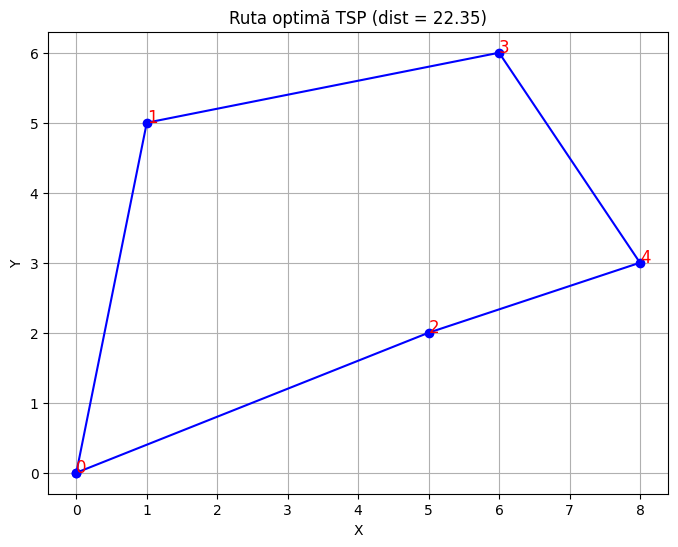

In [ ]:
import numpy as np
import random
import matplotlib.pyplot as plt

# Funcție distanță Euclidiană între două puncte
def euclidean_distance(p1, p2):
    return np.linalg.norm(np.array(p1) - np.array(p2))

# Calculăm lungimea totală a turului (permutație de orașe)
def total_route_distance(route, cities):
    dist = 0.0
    for i in range(len(route)):
        dist += euclidean_distance(cities[route[i]], cities[route[(i + 1) % len(route)]])
    return dist

# Fitness (maximizăm 1 / distanță)
def fitness(route, cities):
    dist = total_route_distance(route, cities)
    return 1.0 / dist if dist > 0 else float('inf')

# Inițializare populație: liste de permutări random
def init_population(pop_size, num_cities):
    population = [list(np.random.permutation(num_cities)) for _ in range(pop_size)]
    return population

# PMX Crossover pentru TSP
def pmx_crossover(parent1, parent2):
    size = len(parent1)
    child1, child2 = [-1]*size, [-1]*size

    # Selectăm două puncte de crossover
    cx_point1 = random.randint(0, size - 2)
    cx_point2 = random.randint(cx_point1 + 1, size - 1)

    # Copiem segmentul de la părintele 1 în copilul 1 și de la părintele 2 în copilul 2
    child1[cx_point1:cx_point2+1] = parent1[cx_point1:cx_point2+1]
    child2[cx_point1:cx_point2+1] = parent2[cx_point1:cx_point2+1]

    def pmx_fill(child, parent_other, start, end):
        for i in range(start, end + 1):
            val = parent_other[i]
            if val not in child:
                pos = i
                while True:
                    val_in_child = child[pos]
                    pos = parent_other.index(val_in_child)
                    if child[pos] == -1:
                        child[pos] = val
                        break

    pmx_fill(child1, parent2, cx_point1, cx_point2)
    pmx_fill(child2, parent1, cx_point1, cx_point2)

    # Completați locurile libere
    for i in range(size):
        if child1[i] == -1:
            child1[i] = parent2[i]
        if child2[i] == -1:
            child2[i] = parent1[i]

    return child1, child2

# Mutatie 2-opt swap: inversează un segment al turului
def two_opt_swap(route):
    size = len(route)
    i, j = sorted(random.sample(range(size), 2))
    new_route = route[:i] + route[i:j+1][::-1] + route[j+1:]
    return new_route

# Selecție prin turneu
def tournament_selection(population, fitnesses, tournament_size=3):
    selected = random.sample(list(zip(population, fitnesses)), tournament_size)
    selected.sort(key=lambda x: x[1], reverse=True)
    return selected[0][0]

# Algoritm genetic pentru TSP
def ga_tsp(cities, pop_size=100, num_generations=500, crossover_rate=0.9,
           mutation_rate=0.2, tournament_size=5, num_elites=2, verbose=True):

    num_cities = len(cities)
    population = init_population(pop_size, num_cities)

    best_route = None
    best_fitness = -float('inf')

    for gen in range(num_generations):
        fitnesses = [fitness(route, cities) for route in population]

        # Păstrăm cele mai bune soluții ca elite
        elites_idx = np.argsort(fitnesses)[-num_elites:]
        new_population = [population[i] for i in elites_idx]

        # Actualizăm cea mai bună soluție
        max_fit = max(fitnesses)
        if max_fit > best_fitness:
            best_fitness = max_fit
            best_route = population[fitnesses.index(max_fit)]

        if verbose and gen % 50 == 0:
            print(f"Generația {gen}: cea mai bună fitness = {best_fitness:.6f}, distanță = {1/best_fitness:.4f}")

        # Generăm restul populației
        while len(new_population) < pop_size:
            parent1 = tournament_selection(population, fitnesses, tournament_size)
            parent2 = tournament_selection(population, fitnesses, tournament_size)

            # Crossover PMX
            if random.random() < crossover_rate:
                offspring1, offspring2 = pmx_crossover(parent1, parent2)
            else:
                offspring1, offspring2 = parent1[:], parent2[:]

            # Mutatie 2-opt
            if random.random() < mutation_rate:
                offspring1 = two_opt_swap(offspring1)
            if random.random() < mutation_rate:
                offspring2 = two_opt_swap(offspring2)

            new_population.append(offspring1)
            if len(new_population) < pop_size:
                new_population.append(offspring2)

        population = new_population

    return best_route, 1 / best_fitness


# Exemplu set orașe (5 orașe cu coordonate 2D)
cities = [
    (0, 0),
    (1, 5),
    (5, 2),
    (6, 6),
    (8, 3)
]

# Rulăm AG TSP
best_route, best_dist = ga_tsp(cities, pop_size=100, num_generations=500, verbose=True)

print("\nCea mai bună rută găsită:")
print(best_route)
print(f"Distanța totală: {best_dist:.4f}")

# Vizualizare rută
def plot_route(route, cities):
    route_cities = [cities[i] for i in route] + [cities[route[0]]]
    xs, ys = zip(*route_cities)
    plt.figure(figsize=(8,6))
    plt.plot(xs, ys, 'o-', color='blue')
    for i, (x, y) in enumerate(route_cities[:-1]):
        plt.text(x, y, str(route[i]), fontsize=12, color='red')
    plt.title(f"Ruta optimă TSP (dist = {best_dist:.2f})")
    plt.xlabel("X")
    plt.ylabel("Y")
    plt.grid(True)
    plt.show()

plot_route(best_route, cities)


9. Rezolvare Experimentare cu parametri:
modificare parametru mutation_probability

In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.03 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')


Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [9, 8]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [9, 9]
Cea mai bună soluție în generația 2: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 2. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.05 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')


Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [8, 8]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [9, 9]
Cea mai bună soluție în generația 2: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 2. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [8, 8]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [9, 8]
Cea mai bună soluție în generația 2: fitness = 9

--- Generația 3/20 ---
Elite selectate (2): fitness-uri [9, 9]
Cea mai bună soluție în generația 3: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 3. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.15 # Probabilitate de mutație per genă
elites_count = 2

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (2): fitness-uri [8, 8]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (2): fitness-uri [9, 9]
Cea mai bună soluție în generația 2: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 2. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


Rezultatele  arată că algoritmul genetic rezolvă cu succes problema One-Max pentru lungimea cromozomului L = 10, indiferent de valoarea probabilității de mutație testate.

10. Rezolvare Discuție avantaje/dezavantaje elitism:

Discutați avantajele și dezavantajele utilizării unui elitism puternic (de exemplu, num_elites mare, apropiat de population_size / 2). Cum ar putea afecta explorarea vs. exploatarea?


In [ ]:
# Funcția fitness pentru One-Max: calculează suma biților dintr-un cromozom.
def one_max_fitness(chromosome):
  return sum(chromosome)

# Setăm parametrii pentru problema One-Max
problem_size_one_max = 10  # Lungimea cromozomului
population_sz = 50
num_gens = 20
mutation_prob = 0.1 # Probabilitate de mutație per genă
elites_count = 5

# Inițializăm algoritmul genetic
# gene_lower_bound=0, gene_upper_bound=1 pentru că avem biți
# global_opt_val este fitness-ul maxim posibil (toți biții sunt 1)
ga_one_max = GeneticAlgorithm(
    population_size=population_sz,
    chromosome_length=problem_size_one_max,
    gene_lower_bound=0,
    gene_upper_bound=1,
    verbose=True,
    global_opt_val=problem_size_one_max # Optimul global este suma maximă, adică lungimea cromozomului
)

# Rulăm procesul de evoluție
print(f"Rezolvăm problema One-Max pentru L={problem_size_one_max}...")
best_solution_one_max, best_fitness_one_max = ga_one_max.evolve(
    fitness_func=one_max_fitness,
    num_generations=num_gens,
    selection_type='tournament',
    tournament_size=3, # Mărimea turneului pentru selecția părinților
    crossover_type='one-point',
    mutation_probability=mutation_prob, # Probabilitatea ca o genă individuală să muteze
    mutation_type='random_reset',
    num_elites=elites_count, # Numărul de indivizi de elită transferați în generația următoare
    replacement_strategy='generational'
)

print(f'\n--- Rezultat One-Max (L={problem_size_one_max}) ---')
print(f'Cea mai bună soluție găsită: {best_solution_one_max}')
print(f'Fitness-ul acesteia: {best_fitness_one_max} (Optim global: {problem_size_one_max})')

Rezolvăm problema One-Max pentru L=10...
Populație inițializată cu 50 indivizi.

--- Generația 1/20 ---
Elite selectate (5): fitness-uri [8, 7, 7, 7, 7]
Cea mai bună soluție în generația 1: fitness = 9
Nouă cea mai bună soluție globală găsită!

--- Generația 2/20 ---
Elite selectate (5): fitness-uri [9, 8, 8, 8, 8]
Cea mai bună soluție în generația 2: fitness = 10
Nouă cea mai bună soluție globală găsită!
Optimul global (10) atins în generația 2. Oprire.

Evoluția finalizată.
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10

--- Rezultat One-Max (L=10) ---
Cea mai bună soluție găsită: [1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
Fitness-ul acesteia: 10 (Optim global: 10)


Utilizarea elitismului în algoritmii genetici este o strategie prin care cei mai buni indivizi dintr-o generație sunt transferați nemodificați în generația următoare. Aceasta are implicații importante asupra echilibrului explorare vs. exploatare, iar folosirea unui număr mare de elite (num_elites mare) are atât avantaje, cât și dezavantaje.
Asigură păstrarea celor mai bune soluții:

Evită pierderea indivizilor performanți din cauza mutației sau a recombinării.

Crește șansa de a atinge și menține soluții optime sau apropiate de optim.

Accelerează convergența:

Populația evoluează mai repede spre regiuni de fitness înalt.

Poate fi eficient pentru probleme unde exploatarea este mai importantă decât explorarea (ex: optimizări cu spațiu de căutare redus)
Stabilitate și performanță reproductibilă:

Reduce variația între rulari (mai puțin dependent de noroc).
Dezavantaje ale unui elitism puternic:
Scade diversitatea genetică:

Cei mai buni indivizi domină populația.

Se reduce explorarea spațiului de soluții.

Risc crescut de convergență prematură:

Populația se poate bloca într-un optimum local, mai ales dacă nu există mecanisme eficiente de mutație sau selecție diversificată.

Exploatare excesivă, explorare slabă:

Dacă prea mulți indivizi sunt elite, restul populației nu are suficient spațiu pentru a experimenta variații noi.

Algoritmul devine mai „determinist”:

Pierde din natura evolutivă adaptivă → explorarea aleatoare e înlocuită de clonarea elitei.

11.Rezolvare

In [ ]:
import numpy as np

# Datele problemei
N = 10  # număr sarcini
M = 3   # număr mașini

P = [10, 15, 8, 12, 20, 10, 18, 13, 9, 16]  # profituri
T = np.array([
    [5, 7, 4, 6, 8, 5, 9, 6, 4, 7],   # Mașina 0
    [6, 8, 5, 7, 9, 6, 10, 7, 5, 8],  # Mașina 1
    [4, 6, 3, 5, 7, 4, 8, 5, 3, 6]    # Mașina 2
])
D = [20, 25, 18]  # timpi disponibili pe mașini


Fiecare cromozom este o listă de lungime N, unde fiecare genă este:

-1 dacă sarcina nu este alocată

0, 1, ..., M-1 pentru indexul mașinii căreia îi este alocată sarcina

In [ ]:
def fitness(chromosome):
    used_time = [0] * M
    total_profit = 0
    penalty = 0

    for task_idx, machine in enumerate(chromosome):
        if machine == -1:
            continue
        time = T[machine][task_idx]
        if used_time[machine] + time <= D[machine]:
            used_time[machine] += time
            total_profit += P[task_idx]
        else:
            # Penalizare pentru depășire
            penalty += (used_time[machine] + time - D[machine]) * 10

    return total_profit - penalty

In [ ]:
import random

POP_SIZE = 100
NUM_GENERATIONS = 200
MUTATION_RATE = 0.1
CROSSOVER_RATE = 0.8

def generate_individual():
    return [random.choice([-1] + list(range(M))) for _ in range(N)]

def mutate(individual):
    for i in range(N):
        if random.random() < MUTATION_RATE:
            individual[i] = random.choice([-1] + list(range(M)))
    return individual

def crossover(parent1, parent2):
    point = random.randint(1, N - 2)
    return parent1[:point] + parent2[point:]

# Inițializare populație
population = [generate_individual() for _ in range(POP_SIZE)]

# Evoluția
best_solution = None
best_fitness = float('-inf')

for gen in range(NUM_GENERATIONS):
    population = sorted(population, key=fitness, reverse=True)
    if fitness(population[0]) > best_fitness:
        best_fitness = fitness(population[0])
        best_solution = population[0]
    new_population = population[:10]  # elitism

    while len(new_population) < POP_SIZE:
        p1, p2 = random.choices(population[:50], k=2)
        if random.random() < CROSSOVER_RATE:
            child = crossover(p1, p2)
        else:
            child = p1[:]
        child = mutate(child)
        new_population.append(child)
    population = new_population

In [ ]:
def print_solution(sol):
    used_time = [0] * M
    total_profit = 0
    print("Alocări sarcini -> mașini:")
    for j, m in enumerate(sol):
        if m == -1:
            print(f"  Sarcina {j} -> Nealocată")
        else:
            print(f"  Sarcina {j} -> Mașina {m} (Timp: {T[m][j]}, Profit: {P[j]})")
            used_time[m] += T[m][j]
            total_profit += P[j]

    print("\nTimp folosit pe fiecare mașină:")
    for i in range(M):
        print(f"  Mașina {i}: {used_time[i]}/{D[i]}")

    print(f"\nProfit total: {total_profit}")

print_solution(best_solution)

Alocări sarcini -> mașini:
  Sarcina 0 -> Mașina 1 (Timp: 6, Profit: 10)
  Sarcina 1 -> Mașina 2 (Timp: 6, Profit: 15)
  Sarcina 2 -> Mașina 0 (Timp: 4, Profit: 8)
  Sarcina 3 -> Mașina 0 (Timp: 6, Profit: 12)
  Sarcina 4 -> Mașina 1 (Timp: 9, Profit: 20)
  Sarcina 5 -> Mașina 0 (Timp: 5, Profit: 10)
  Sarcina 6 -> Mașina 1 (Timp: 10, Profit: 18)
  Sarcina 7 -> Mașina 2 (Timp: 5, Profit: 13)
  Sarcina 8 -> Mașina 0 (Timp: 4, Profit: 9)
  Sarcina 9 -> Mașina 2 (Timp: 6, Profit: 16)

Timp folosit pe fiecare mașină:
  Mașina 0: 19/20
  Mașina 1: 25/25
  Mașina 2: 17/18

Profit total: 131


12.Rezolvare Maparea genotip -> fenotip și evaluarea fitness-ului
a) Decodificare genotip -> fenotip:
I.Genotip G1: [0,0,1,1, 1,0,1,0]
x = [0,0,1,1] = 3
y = [1,0,1,0] = 10

Fenotip G1 = (3, 10)
II.Genotip G2: [1,1,1,1, 0,0,0,0]
x = [1,1,1,1] = 15

y = [0,0,0,0] = 0
Fenotip G2 = (15, 0)
III.G3: [0,1,1,0, 1,0,0,1]
x = [0,1,1,0] = 6

y = [1,0,0,1] = 9
 Fenotip G3 = (6, 9)



b) Calculul funcției obiectiv și al fitness-ului:
i. G1 = (3, 10)
f(3,10)=(3-5)
f(3,10)=(3-5)^2 + (10-10)^2 = 4+0 = 4
fitness = 1000-4 = 996
ii. G2 = (15, 0)
f(15,0)=(15-5)^2 + (0-10)^2 = 100+100=200
fitness = 1000 -200 = 800
iii. G3 = (6, 9)
f(6,9) = (6-5)^2 + (9-10)^2 = 1+1=2
fitness = 1000 -2 = 998


c) Găsirea optimului (analitic):
Funcția este o parabolă 2D cu minimum global în:
I. x=5,y=10;
Valoare minima: f(5,10) = (5-5)^2 + (10-10)^2 = 0
II Valoarea maximă a fitness-ului:
Fitness max = 1000-0 =1000;

d) Genotip optim:
Pentru perechea (x=5, y=10):
5->0101
10->1010
Genotip optim = [0,1,0,1, 1,0,1,0]

12.Rezolvare Avem următoarea populație P1 formată din 5 indivizi, cu următoarele valori de fitness:

a) Selecția proporțională cu fitness-ul (ruletă):
 fitness-ului pentru populația P1 = 10 + 80 + 5+ 25 + 60 =180
 Probabilitati de selectie:
 A = (10/180) * 100 = 5.56
 B = (80/180) * 100 = 44.44
 C = (5/180) * 100 = 2.78
 D = (25/180) * 100 = 13.89
 E = (60/180) * 100 = 33.33

b) Selecția bazată pe rang:
 i. Ordonați indivizii din populația P1 în funcție de fitness-ul lor, de la cel mai slab (mic) la cel mai bun (mare).
C (5), A (10), D (25), E (60), B (80)
II RANG: C=1;A=2;D=3;E=4;B=5
III. Suma totala rang = 1+2+3+4+5 =15
IV: Probabiltati dupa rang:
A = (2/15) * 100 = 13.33
B = (5/15) * 100 = 33.33
C = (1/15) * 100 = 6.67
D = (3/15) * 100 = 20.00
E = (4/15) * 100 = 26.67

c) Selecția Turnir (Tournament Selection):
I. Avem A,B,C,D,E = 5 indivizi. perechi unice = 10 (turnee)
B vs A = B
B vs C = B
B vs D= B
B vs E = B
Probabilitatea sa castige B este 4/100)*100 = 40%
II. Varianta sa castige C
C vs A = A
C vs B= B
C vs D = D
C vs E = E
C pierde toate



d)d) Impactul unui "super individ" - populația P2:
I. Total fitnes P2= 5+10+1000+15+20=1050
Probabilitati de selectie:
 F = (5/1050) * 100 = 0.48
 G= (10/1050) * 100 = 0.95
 H= (1000/1050) * 100 = 95.24
 I = (15/1050) * 100 = 1.43
 J = (20/1050) * 100 = 1.90
 H domina

 ii. Selecție bazată pe rang : Ranguri: F=1, G=2, I=3, J=4, H=5

 Total ranguri=1+2+3+4+5=15
 F =1 = 6.67
 G = 2 = 13.33
 I = 3=20
 J = 4 = 26.67
 H = 5 = 33.33
